# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Представим в виде $Q(w + dw) = Q(w) + dQ(w)[dw] + o(||dw||), \ $ где $dQ(w)[dw] = \langle\nabla_wQ(w), dw\rangle$

$$
    \dfrac{1}{\ell} \left( y - X(w + dw) \right)^T \left( y - X(w + dw) \right) = \underbrace{\dfrac{1}{\ell} \langle y - Xw, y - Xw\rangle}_{Q(w)} - \underbrace{2\dfrac{1}{\ell}\langle y - Xw, Xdw\rangle}_{dQ(w)[dw]} + \underbrace{\frac{1}{\ell} \langle Xdw, Xdw \rangle}_{o(||dw||)}
$$

$$
    dQ(w)[dw] = -2\frac{1}{l}\langle X^T(y-Xw), dw\rangle \Rightarrow \nabla_wQ(w) = -\frac{2}{l}X^T(y-Xw)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [24]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [26]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [27]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [28]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/123686991/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/123687264/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/123687541/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/123696466/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/123698845/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [29]:
import numpy as np
import polars as pl  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [30]:
data = pl.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [31]:
data.head()

brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
str,str,str,str,str,str,i64,i64,i64,i64
"""volkswagen""","""golf""","""kleinwagen""","""manuell""","""benzin""","""nein""",75,150000,177,1500
"""skoda""","""fabia""","""kleinwagen""","""manuell""","""diesel""","""nein""",69,90000,93,3600
"""bmw""","""3er""","""limousine""","""manuell""","""benzin""","""ja""",102,150000,246,650
"""peugeot""","""2_reihe""","""cabrio""","""manuell""","""benzin""","""nein""",109,150000,140,2200
"""mazda""","""3_reihe""","""limousine""","""manuell""","""benzin""","""nein""",105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Text(0.5, 1.0, 'distribution of target variable (log_scale(x))')

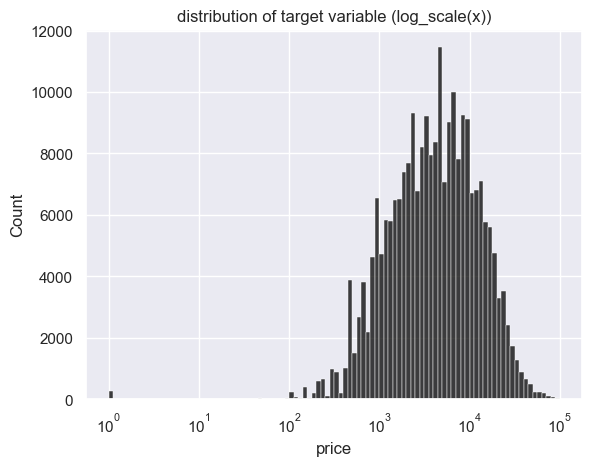

In [32]:


my_data = data.with_row_index()

sns.histplot(data=my_data,
             x='price',
             color='black',
             bins=100,
             log_scale=True
             ).set_title('distribution of target variable (log_scale(x))')

Как видим у нас есть выбросы, поэтому давайте их кикнем 

Text(0.5, 1.0, 'distribution of cleaned log_target variable')

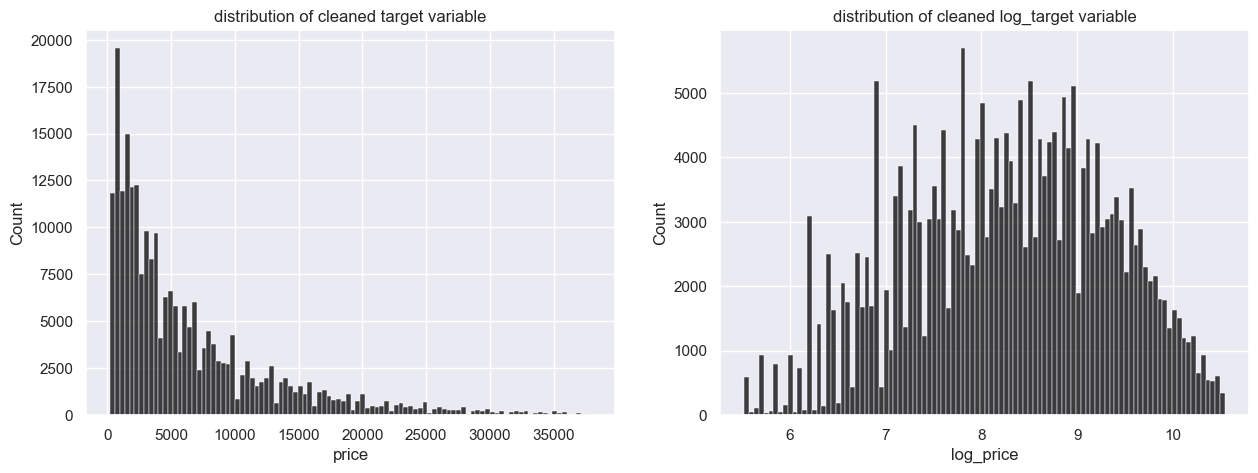

In [33]:
edge_low = np.quantile(my_data.select('price'), 0.01)
edge_high = np.quantile(my_data.select('price'), 0.99)
cleaned = my_data.filter((pl.col('price') <= edge_high).and_(pl.col('price') >= edge_low))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=cleaned,
             x='price',
             color='black',
             bins=100,
             ax=ax1
             ).set_title('distribution of cleaned target variable')

#попробуем прологарифмировать таргет переменную 

cleaned_log = cleaned.with_columns(np.log1p(pl.col('price')).alias('log_price'))

sns.histplot(data=cleaned_log,
             x='log_price',
             color='black',
             ax=ax2,
             bins=100
             ).set_title('distribution of cleaned log_target variable')

Прологарифмировать есть смысл, поскольку тогда распределение становится похожим на нормальное, на котором линрег работает лучше 

In [34]:
#теперь исследование даннных 
cleaned_log.describe()

statistic,index,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
str,f64,str,str,str,str,str,str,f64,f64,f64,f64,f64
"""count""",236684.0,"""236684""","""236684""","""236684""","""236684""","""236684""","""236684""",236684.0,236684.0,236684.0,236684.0,236684.0
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",120586.192759,null,null,null,null,null,null,130.006718,124310.874415,144.715612,6502.014521,8.274665
"""std""",69627.406084,null,null,null,null,null,null,57.688795,39259.346281,72.084054,6591.450369,1.066161
"""min""",0.0,"""alfa_romeo""","""100""","""andere""","""automatik""","""andere""","""ja""",51.0,5000.0,1.0,250.0,5.525453
"""25%""",60267.0,null,null,null,null,null,null,90.0,100000.0,92.0,1800.0,7.496097
"""50%""",120608.0,null,null,null,null,null,null,118.0,150000.0,140.0,4100.0,8.318986
"""75%""",180891.0,null,null,null,null,null,null,160.0,150000.0,192.0,8900.0,9.093919
"""max""",241189.0,"""volvo""","""zafira""","""suv""","""manuell""","""lpg""","""nein""",585.0,150000.0,600.0,37900.0,10.542733


Вроде с типами данных все в порядке 

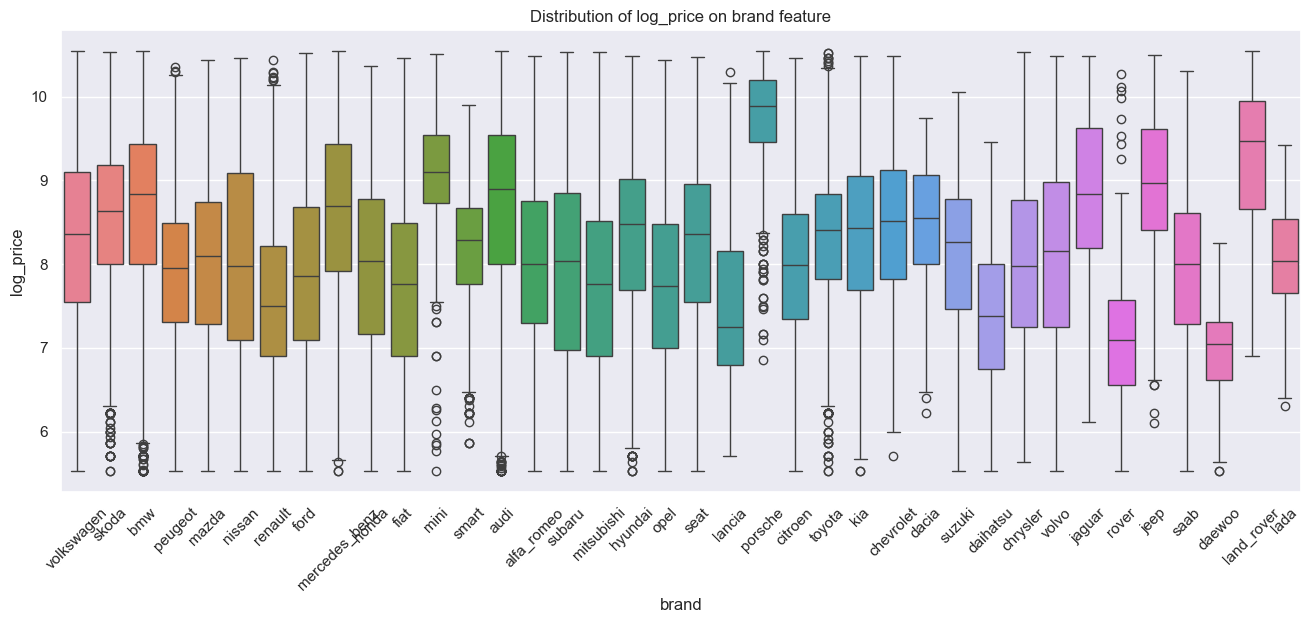

In [35]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='brand', 
            y='log_price', 
            hue='brand',
            data=cleaned_log).set(title='Distribution of log_price on brand feature')
plt.xticks(rotation=45)
plt.show()

Как видим брэнды адекватно кластеризированы по ценам, логино, что ауди, порш, бэха и другие крутые бренды в более дорогом сегменте, поэтому категоризация может быть полезной 

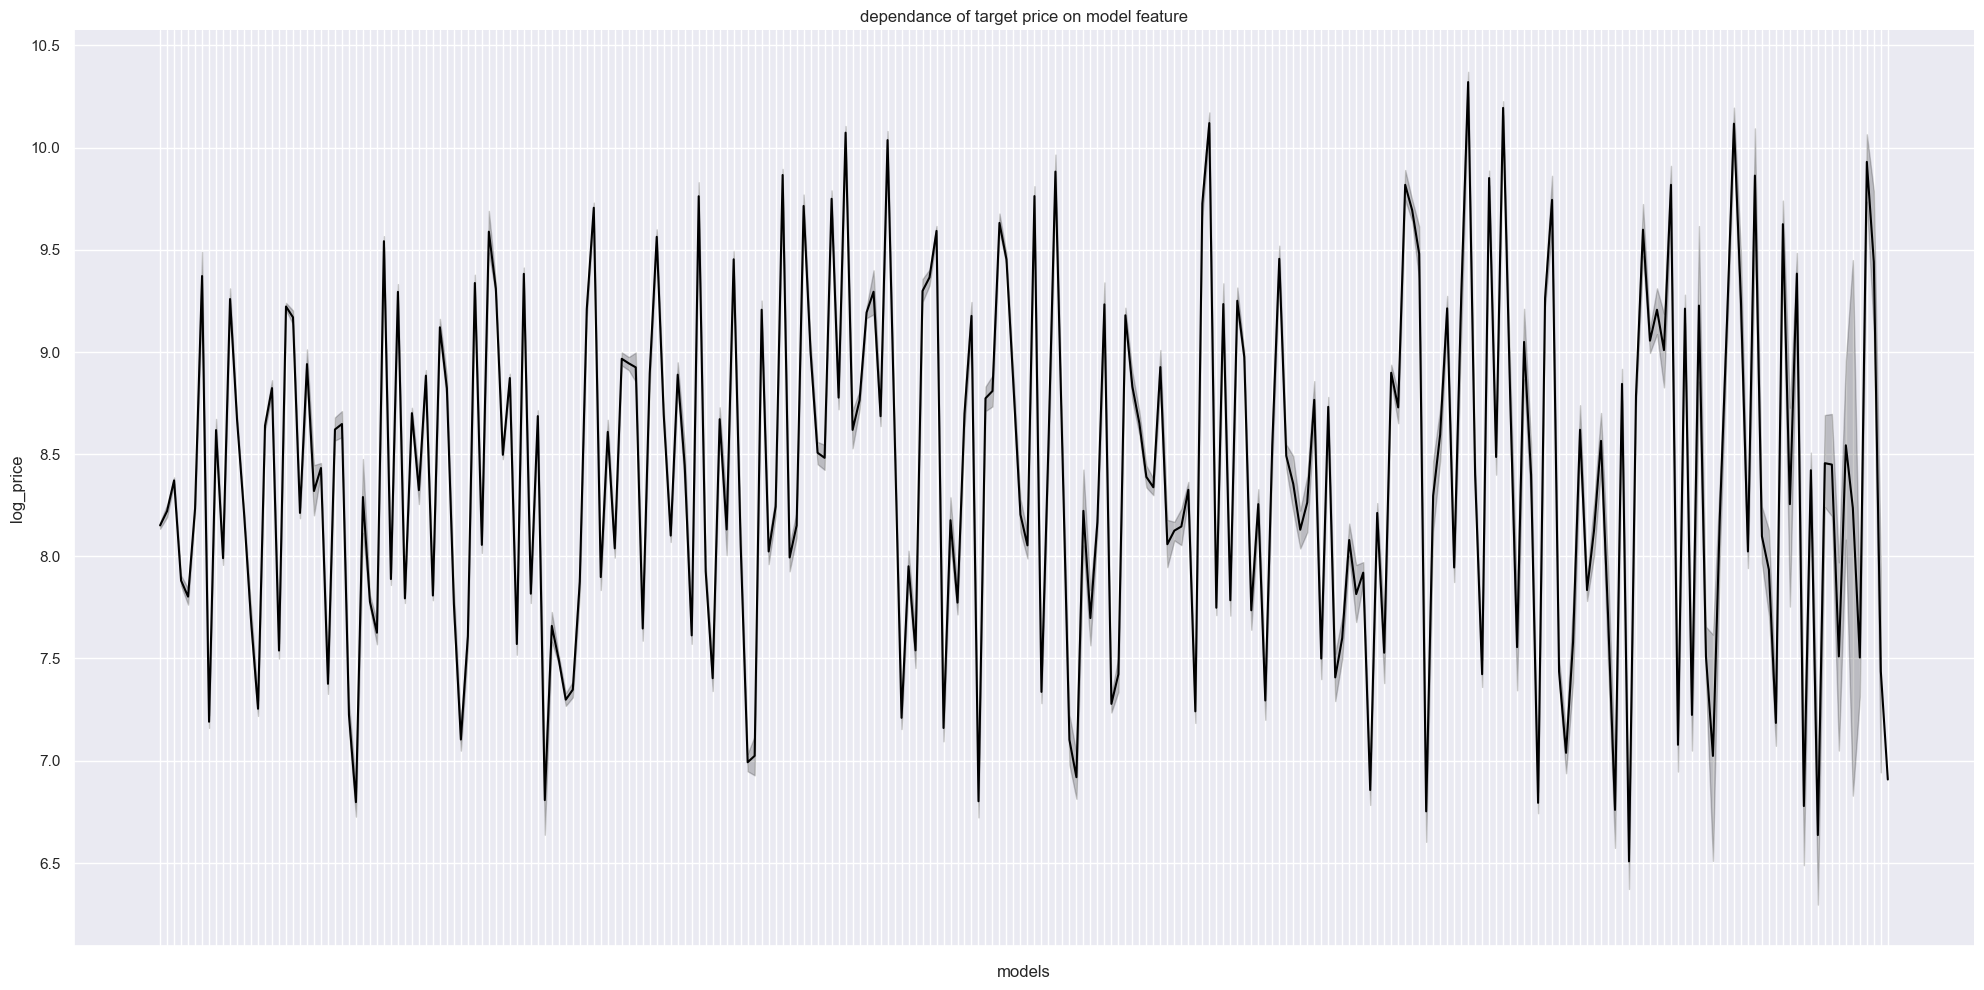

In [36]:
#проделаем то же самое с остальными  
sns.relplot(data=cleaned_log,
             x='model',
             y='log_price',
             color='black',
             kind='line',
             height=10,
             aspect=2
             ).set(xticklabels=[], xlabel='models', title='dependance of target price on model feature') 

Как видим для разных моделей (я не накладывал их на ось X иначе там бы случился потом из букв) средние значений прайса разные и отображают разную зависимость, поэтому думаю модель тоже стоит использовать как категриальный признак. 

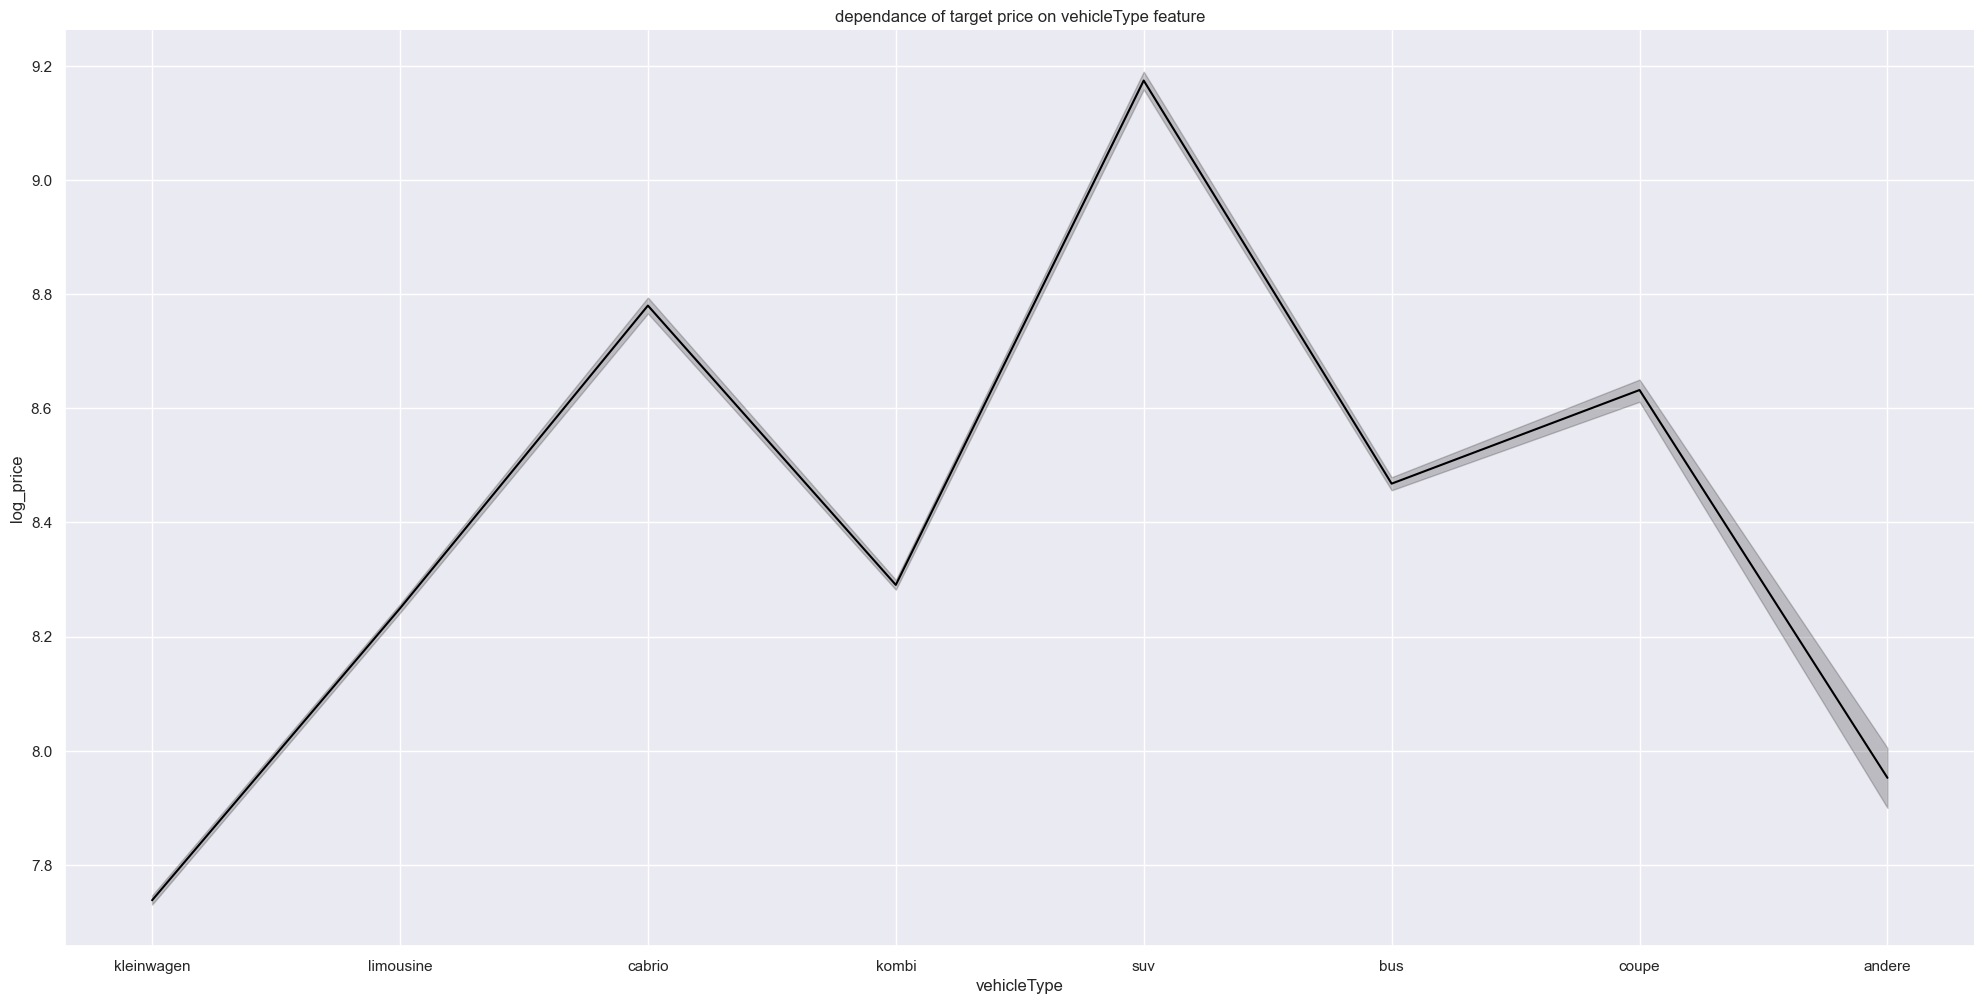

In [37]:
sns.relplot(data=cleaned_log,
             x='vehicleType',
             y='log_price',
             color='black',
             kind='line',
             height=10,
             aspect=2
             ).set(title='dependance of target price on vehicleType feature') 

Тут тоже все гуд, разные типы кузова соответствуют разным средним ценам, кластеризация логична и разделима, поэтому этого тоже берем 

<Axes: xlabel='notRepairedDamage', ylabel='log_price'>

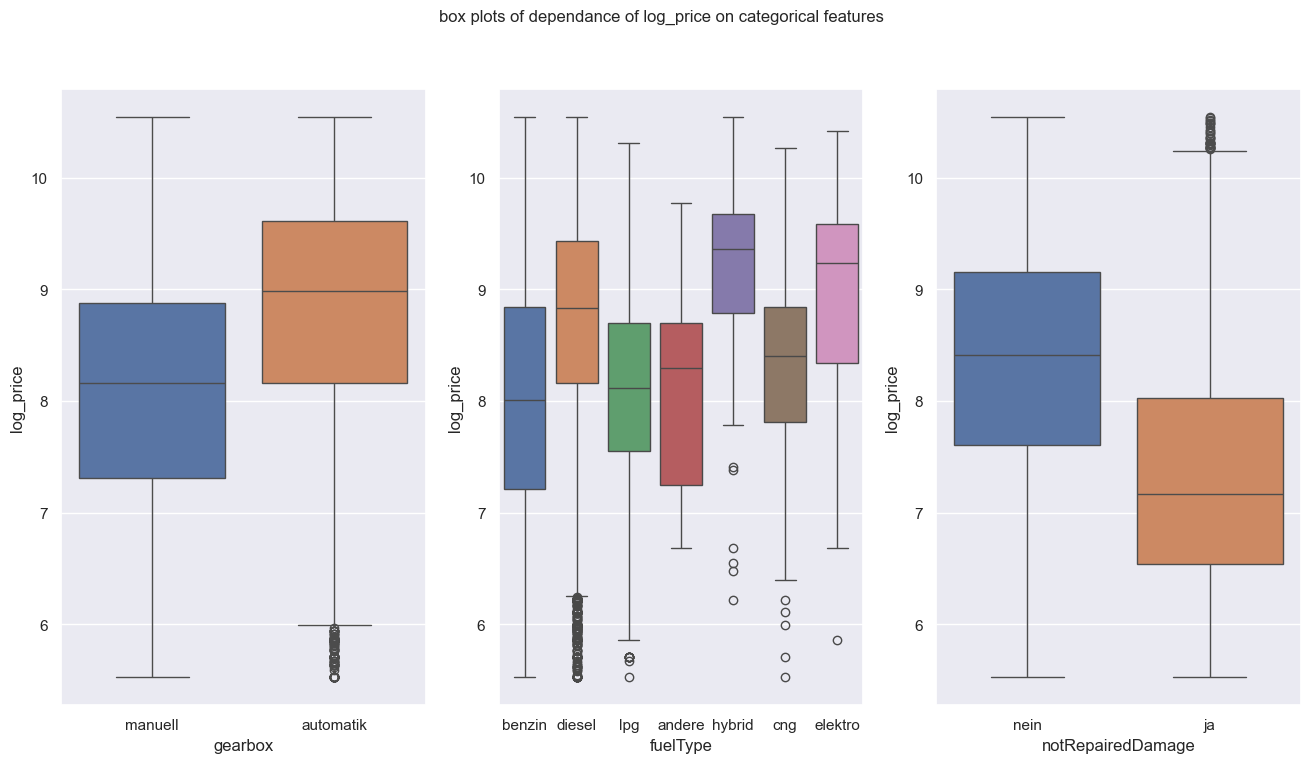

In [38]:
#построим ящики с усами для оставшихся кандидатов на категориальные признаки 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle('box plots of dependance of log_price on categorical features', fontsize=12)
sns.boxplot(data=cleaned_log,
            x='gearbox',
            y='log_price',
            hue='gearbox',
            ax=ax1)
sns.boxplot(data=cleaned_log,
            x='fuelType',
            y='log_price',
            hue='fuelType',
            ax=ax2)
sns.boxplot(data=cleaned_log,
            x='notRepairedDamage',
            y='log_price',
            hue='notRepairedDamage',
            ax=ax3)

Тут тоже все логично и адекватно, кластеры разные и информирующие о таргете

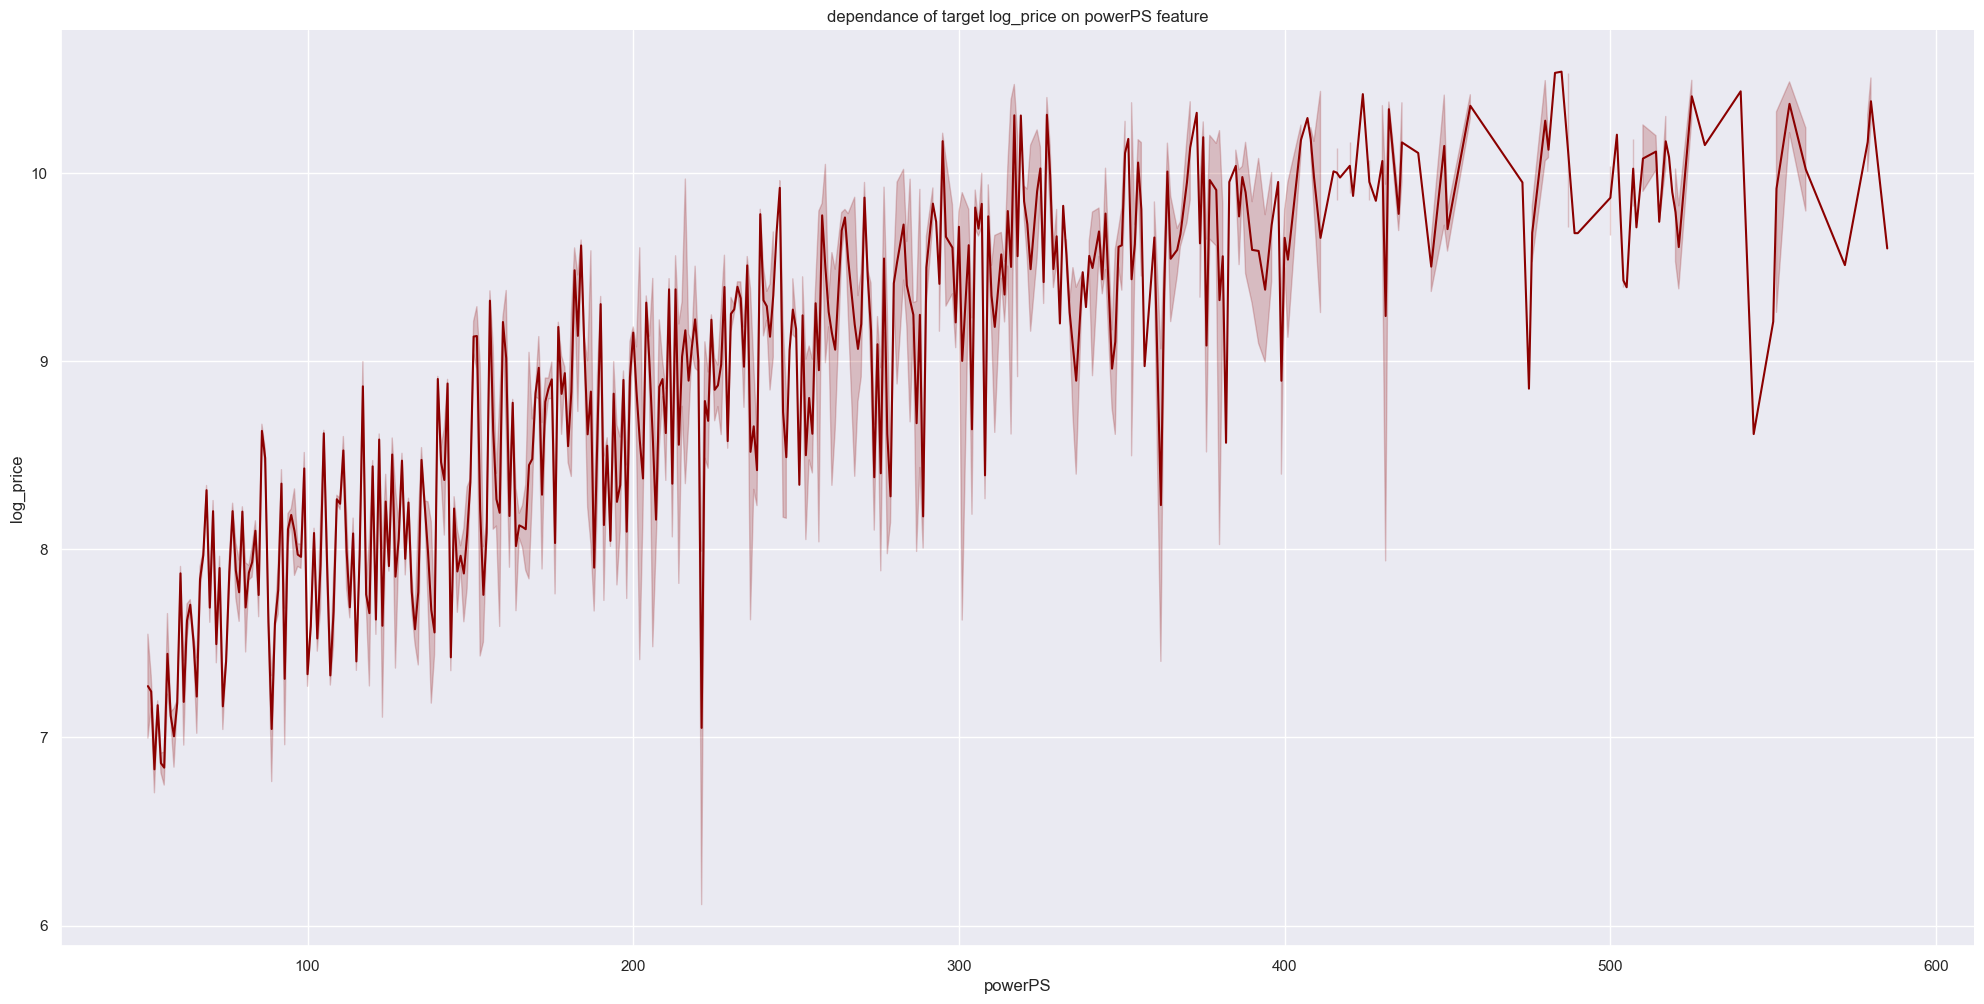

In [39]:
#теперь веществвенные признаки изучим 
sns.relplot(data=cleaned_log,
             x='powerPS',
             y='log_price',
             color='darkred',
             kind='line',
             height=10,
             aspect=2
             ).set(title='dependance of target log_price on powerPS feature') 

Невооруженным взглядом видно, что восходящий линейный тренд, что хорошо 

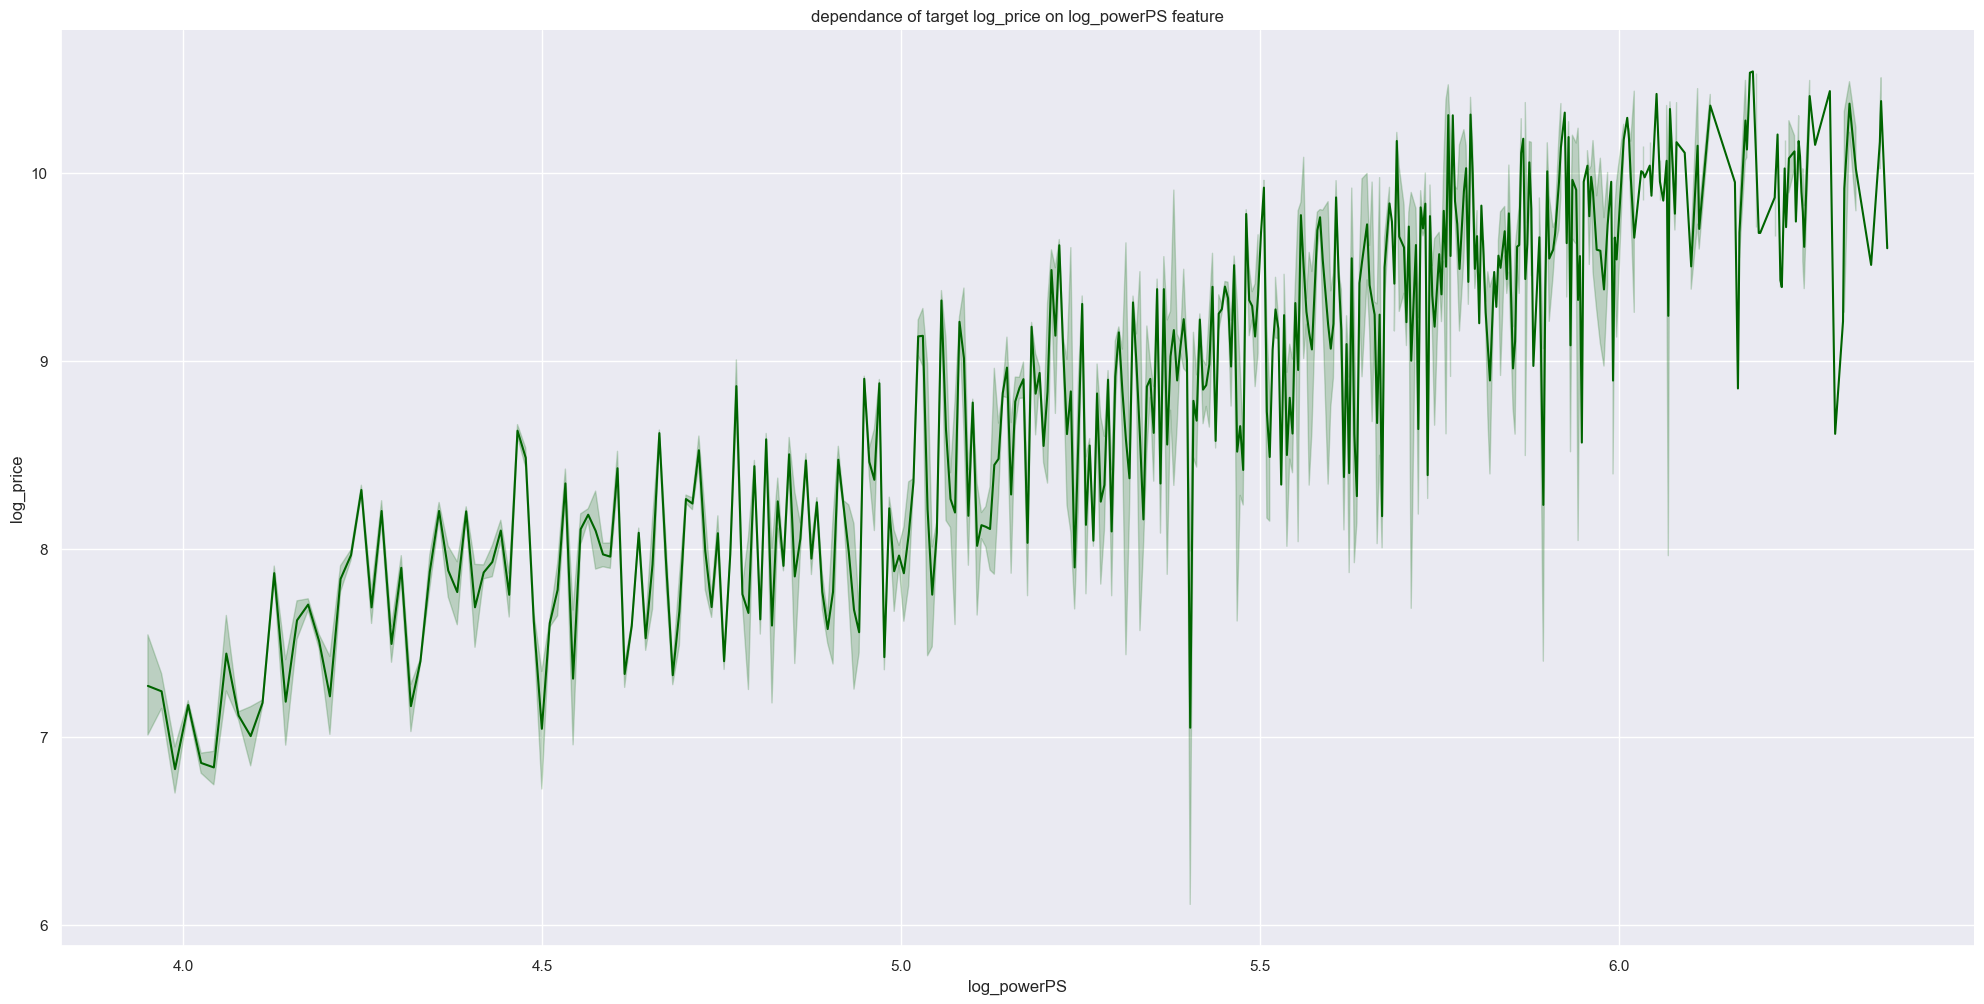

In [40]:
#попробуем прологарифмировать powerPS 
test_data = cleaned_log.with_columns(np.log1p(pl.col('powerPS')).alias('log_powerPS'))
sns.relplot(data=test_data,
             x='log_powerPS',
             y='log_price',
             color='darkgreen',
             kind='line',
             height=10,
             aspect=2
             ).set(title='dependance of target log_price on log_powerPS feature') 

In [41]:
#по графику не понятно стало лучше или хуже давайте посчитает корреляцию пирсона 
test_data.select('log_price', 'log_powerPS', 'powerPS').corr()

log_price,log_powerPS,powerPS
f64,f64,f64
1.0,0.551629,0.530809
0.551629,1.0,0.959503
0.530809,0.959503,1.0


Разница небольшая поэтому не буду париться и в лог переводить. Будем использовать этот признак как очевидно числовой, стандартизуя его и отскейля.

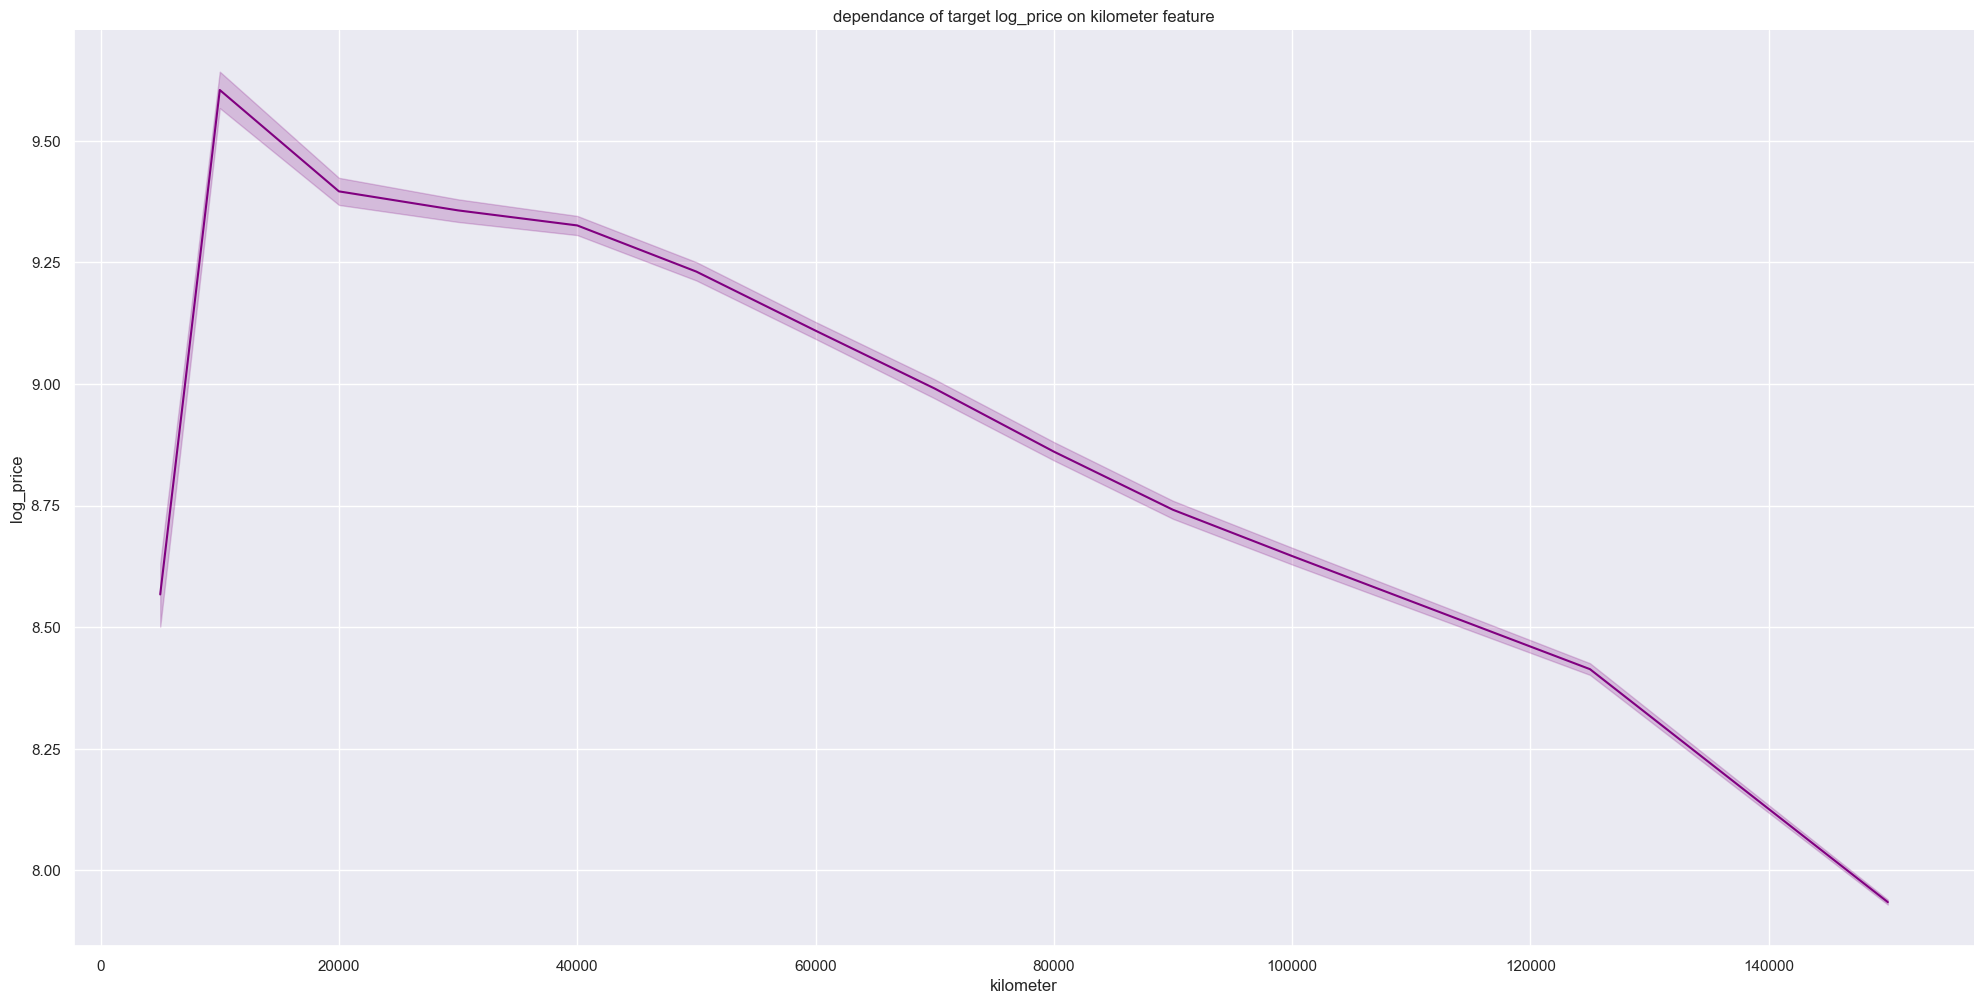

In [42]:
#теперь смотрим kilometer 
sns.relplot(data=cleaned_log,
             x='kilometer',
             y='log_price',
             color='purple',
             kind='line',
             height=10,
             aspect=2
             ).set(title='dependance of target log_price on kilometer feature') 

Тут вообще красота, тренд почти линейный, что круто-классно точно используем

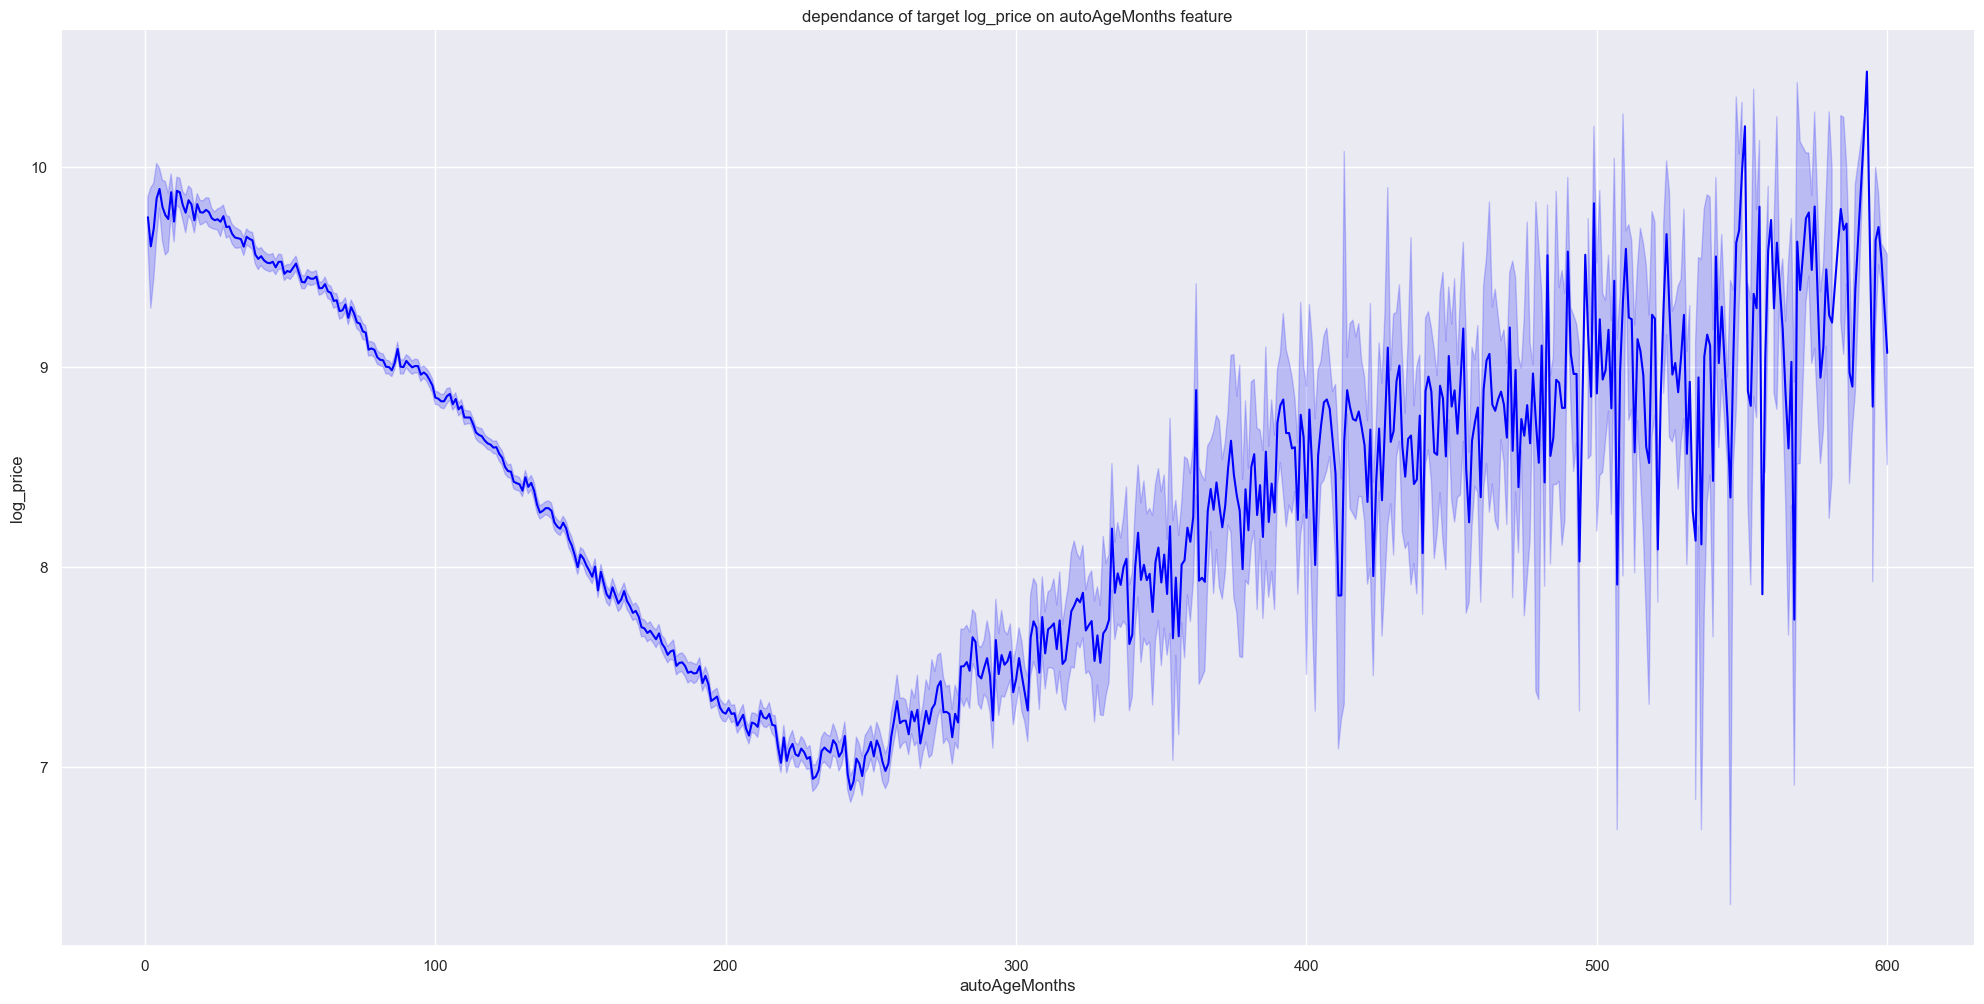

In [43]:
#теперь смотрим autoAgeMonths 
sns.relplot(data=cleaned_log,
             x='autoAgeMonths',
             y='log_price',
             color='blue',
             kind='line',
             height=10,
             aspect=2
             ).set(title='dependance of target log_price on autoAgeMonths feature') 

Заметим что тут у нас два линейных тренда примерно до 250 месяцев нисходящий, а потом восходящий, поэтому давайте введем новый признак - is_young, равный 1 при autoAgeMonths <= 250, и 0 при autoAgeMonths > 250

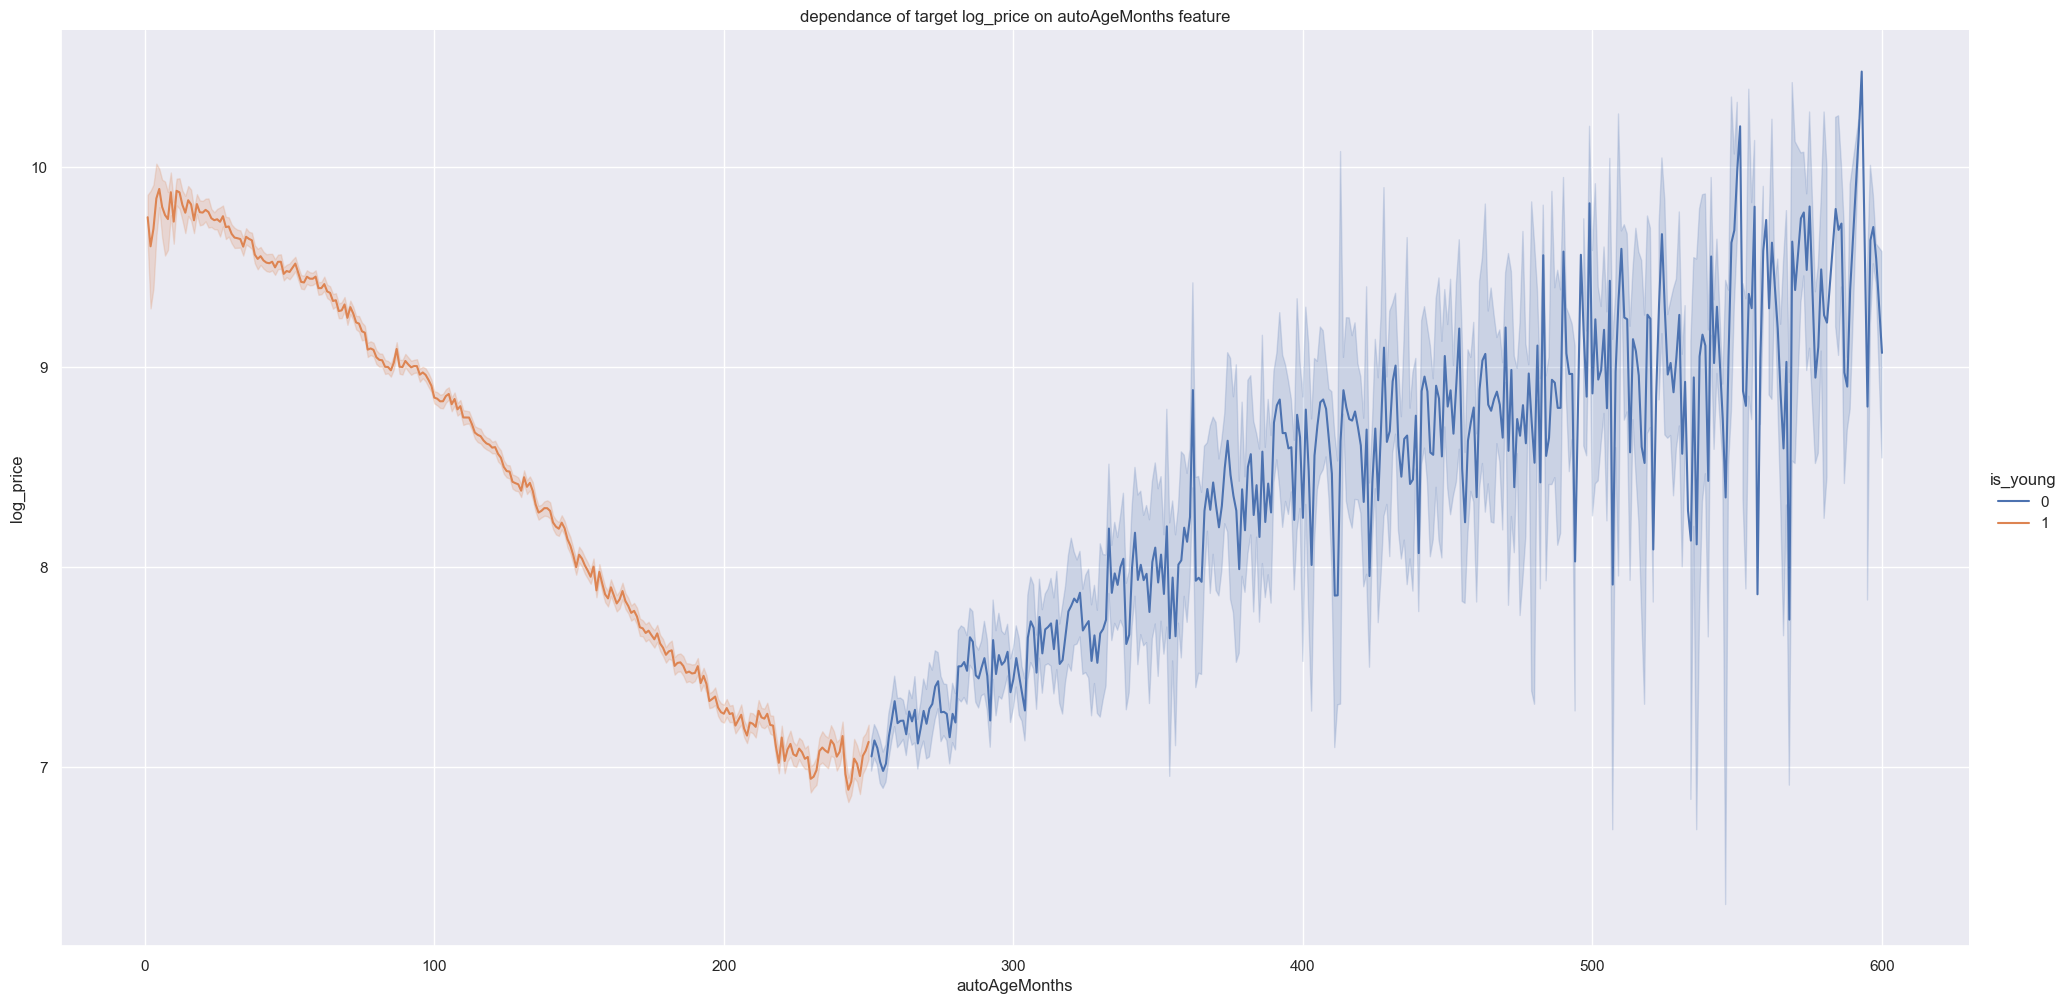

In [44]:
c = cleaned_log.with_columns(pl.when(pl.col('autoAgeMonths') <= 250).then(1).otherwise(0).alias('is_young'))
c.group_by('autoAgeMonths', 'is_young').agg(pl.col('log_price').mean())
sns.relplot(data=c,
             x='autoAgeMonths',
             y='log_price',
             hue='is_young',
             kind='line',
             height=10,
             aspect=2
             ).set(title='dependance of target log_price on autoAgeMonths feature') 

In [45]:
my_data = c
my_data

index,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price,is_young
u32,str,str,str,str,str,str,i64,i64,i64,i64,f64,i32
0,"""volkswagen""","""golf""","""kleinwagen""","""manuell""","""benzin""","""nein""",75,150000,177,1500,7.313887,1
1,"""skoda""","""fabia""","""kleinwagen""","""manuell""","""diesel""","""nein""",69,90000,93,3600,8.188967,1
2,"""bmw""","""3er""","""limousine""","""manuell""","""benzin""","""ja""",102,150000,246,650,6.47851,1
3,"""peugeot""","""2_reihe""","""cabrio""","""manuell""","""benzin""","""nein""",109,150000,140,2200,7.696667,1
4,"""mazda""","""3_reihe""","""limousine""","""manuell""","""benzin""","""nein""",105,150000,136,2000,7.601402,1
…,…,…,…,…,…,…,…,…,…,…,…,…
241185,"""volkswagen""","""golf""","""limousine""","""manuell""","""diesel""","""nein""",140,150000,69,7900,8.974745,1
241186,"""seat""","""leon""","""limousine""","""manuell""","""benzin""","""ja""",225,150000,142,3200,8.071219,1
241187,"""smart""","""fortwo""","""cabrio""","""automatik""","""benzin""","""nein""",101,125000,192,1199,7.090077,1


#### Обрабатываем выбросы 

<Axes: xlabel='autoAgeMonths'>

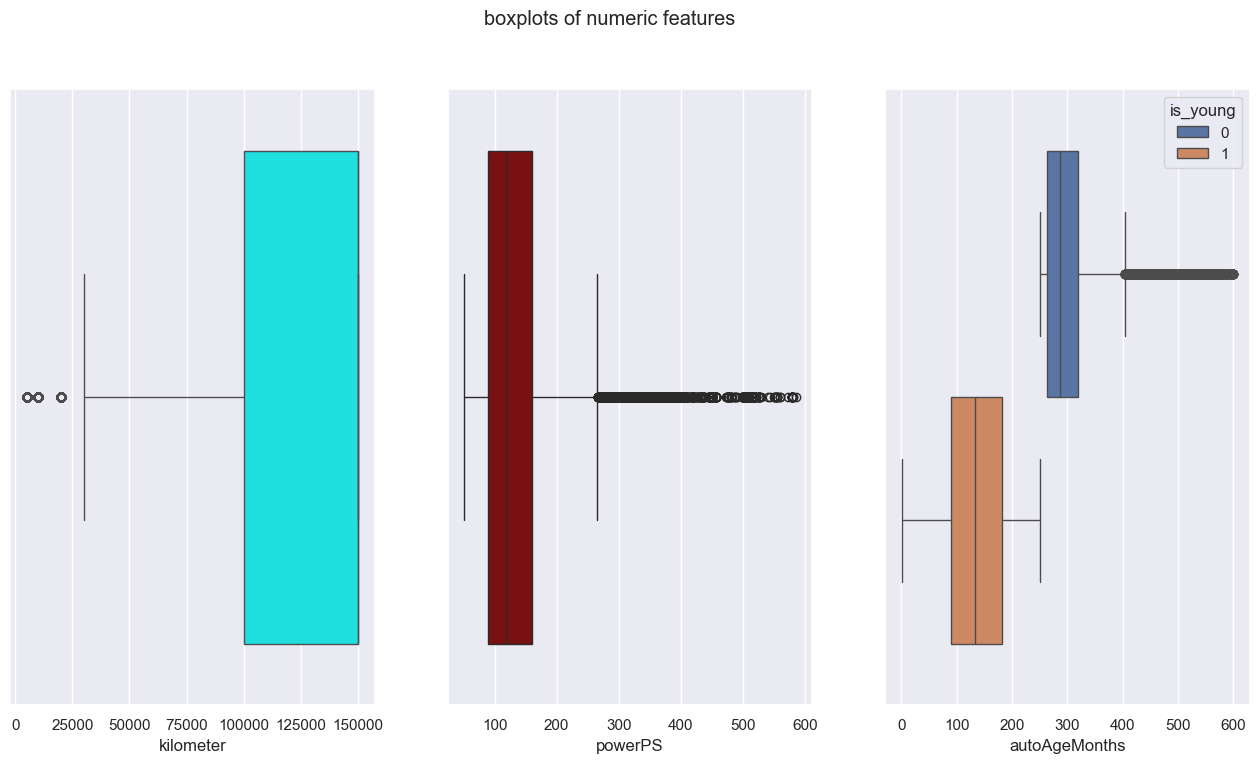

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle('boxplots of numeric features')
sns.boxplot(data=my_data,
            ax=ax1,
            color='cyan',
            x='kilometer')
sns.boxplot(data=my_data,
            ax=ax2,
            color='darkred',
            x='powerPS')
sns.boxplot(data=my_data,
            ax=ax3,
            hue='is_young',
            x='autoAgeMonths')

In [47]:
#кокаем выбросы 
kilo_low = np.quantile(my_data.select('kilometer'), 0.25) - 1.5 * (np.quantile(my_data.select('kilometer'), 0.75) - np.quantile(my_data.select('kilometer'), 0.25))
PS_up = np.quantile(my_data.select('powerPS'), 0.75) + 1.5 * (np.quantile(my_data.select('powerPS'), 0.75) - np.quantile(my_data.select('powerPS'), 0.25))
autoAgeMonths_up = np.quantile(my_data.filter(pl.col('is_young') == 0).select('autoAgeMonths'), 0.75) + 1.5 * (np.quantile(my_data.filter(pl.col('is_young') == 0).select('autoAgeMonths'), 0.75) - np.quantile(my_data.filter(pl.col('is_young') == 0).select('autoAgeMonths'), 0.25))
my_data_1 = my_data.filter((pl.col('kilometer') >= kilo_low).and_(pl.col('powerPS') <= PS_up).and_(pl.col('autoAgeMonths') <= autoAgeMonths_up))
my_data_final = my_data_1.drop('index', 'price')
my_data_final

brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,log_price,is_young
str,str,str,str,str,str,i64,i64,i64,f64,i32
"""volkswagen""","""golf""","""kleinwagen""","""manuell""","""benzin""","""nein""",75,150000,177,7.313887,1
"""skoda""","""fabia""","""kleinwagen""","""manuell""","""diesel""","""nein""",69,90000,93,8.188967,1
"""bmw""","""3er""","""limousine""","""manuell""","""benzin""","""ja""",102,150000,246,6.47851,1
"""peugeot""","""2_reihe""","""cabrio""","""manuell""","""benzin""","""nein""",109,150000,140,7.696667,1
"""mazda""","""3_reihe""","""limousine""","""manuell""","""benzin""","""nein""",105,150000,136,7.601402,1
…,…,…,…,…,…,…,…,…,…,…
"""seat""","""leon""","""limousine""","""manuell""","""diesel""","""nein""",105,150000,93,8.389587,1
"""volkswagen""","""golf""","""limousine""","""manuell""","""diesel""","""nein""",140,150000,69,8.974745,1
"""seat""","""leon""","""limousine""","""manuell""","""benzin""","""ja""",225,150000,142,8.071219,1


Пока попробую остановиться на этом, если совсем плохо буду то вернусь к выбросам.
Кажется что все категории стоит попробовать использовать, категориальные сделать OHE а для численных scaling по классике.

In [48]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'is_young']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []
data = my_data_final.to_pandas()

In [49]:
data['bias'] = 1
other += ['bias']
data
x = data[categorical + numeric + other]
y = data['log_price'].to_numpy()

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [160]:
#создадим функцию, которая будет трейнить все 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

def SuperFunction(name, X_t, y_t, X_v, y_v, lambda_):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': X_t.shape[1],
            'lambda_': lambda_
        }
    }
    model = LinearRegression(
        descent_config=descent_config
    )
    model.fit(X_t, y_t)
    y_v_predict = model.predict(X_v)
    val_mse = model.calc_loss(X_v, y_v)
    iter_cnt = len(model.loss_history)
    r2 = r2_score(y_v, y_v_predict)

    return model, val_mse, iter_cnt, r2


In [161]:
lambdas = {'full': np.logspace(-4, -0.5, 25), 'stochastic': np.logspace(-4, -0.5, 25), 'momentum': np.logspace(-4, -0.5, 25), 'adam': np.logspace(-4, 0, 25)}
best_l = 0
best_r2 = 0
metrics = {}
losses = {}

descent_names = ['full', 'stochastic', 'momentum', 'adam']
for descent in descent_names:
    best_val_mse = 1000000000000
    for l in lambdas[descent]:
        model, val_mse, iter_cnt, r2 = SuperFunction(descent, X_train, y_train, X_val, y_val, l)
        if val_mse < best_val_mse:
            best_l = l
            best_val_mse = val_mse
            best_r2 = r2
            metrics[descent] = {'model' : model,
                                'val_mse': best_val_mse,
                                'r2': r2,
                                'lambda': l,
                                'num_of_iter': iter_cnt
                                } 
            losses[descent] = model.loss_history
    print(f'best_lambda for {descent}: {best_l}')
    print(f'best_val_mse for {descent}: {best_val_mse}')
    print(f'best_r2 for {descent}: {best_r2}')
    print()

best_lambda for full: 0.31622776601683794
best_val_mse for full: 0.3281497822034127
best_r2 for full: 0.6947422250902968

best_lambda for stochastic: 0.31622776601683794
best_val_mse for stochastic: 0.31008432724500057
best_r2 for stochastic: 0.7115474185794043

best_lambda for momentum: 0.31622776601683794
best_val_mse for momentum: 0.20440138259355844
best_r2 for momentum: 0.8098578313231999

best_lambda for adam: 1.0
best_val_mse for adam: 0.16708624650723705
best_r2 for adam: 0.8445698318483211



In [162]:
for m in metrics.keys():
    cur_model = metrics[m]['model']
    y_test_predict = cur_model.predict(X_test)
    print(f'rmse for {m}:', cur_model.calc_loss(X_test, y_test))
    print(f'r2 for {m}:', r2_score(y_test, y_test_predict))
    print()

rmse for full: 0.33216869535465876
r2 for full: 0.693878664247574

rmse for stochastic: 0.3170925125169036
r2 for stochastic: 0.707772632261067

rmse for momentum: 0.2132388199666924
r2 for momentum: 0.8034825276572843

rmse for adam: 0.17448031196614006
r2 for adam: 0.8392017462556295



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

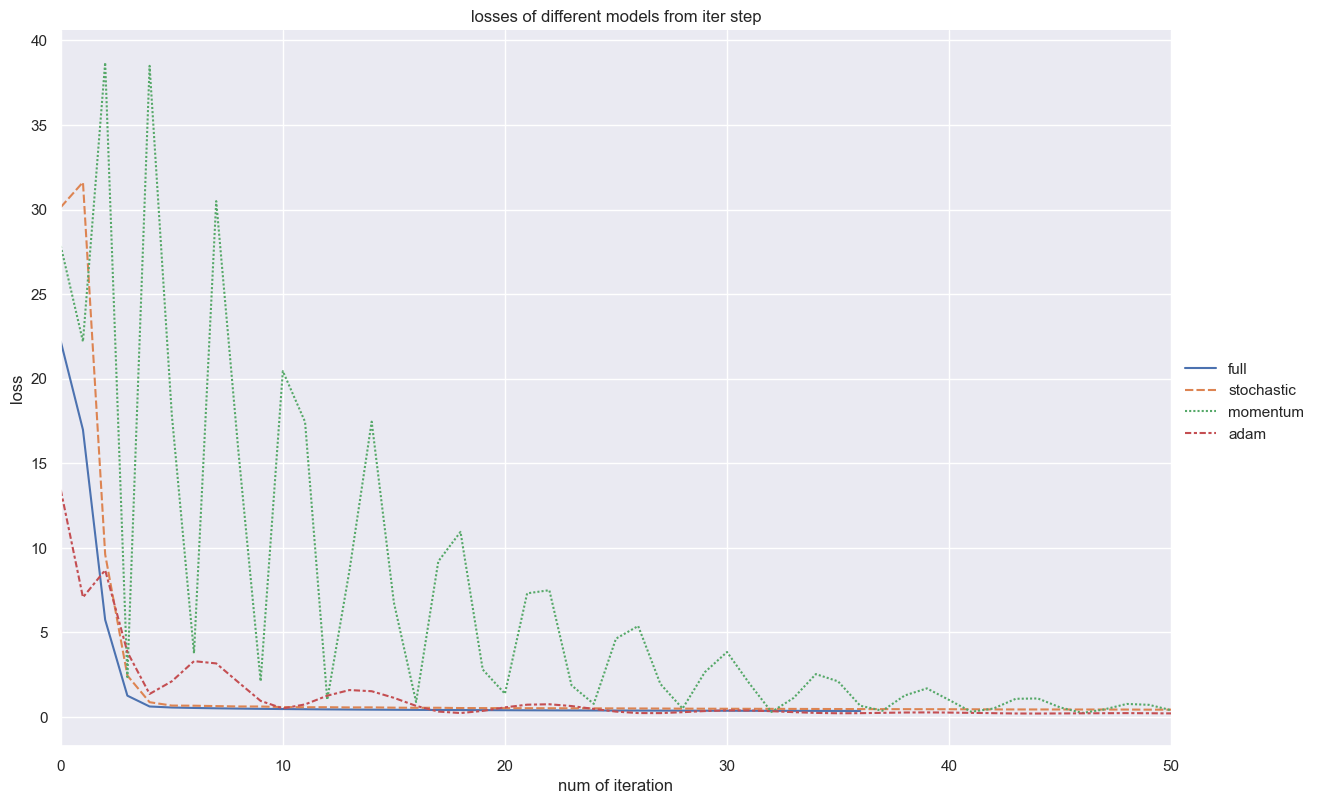

In [163]:
sns.relplot(losses,
            kind='line',
            height=8,
            aspect=1.5).set(xlabel='num of iteration', ylabel='loss', title='losses of different models from iter step', xlim=(0, 50))

In [164]:
print('full:', pl.DataFrame(metrics['full']).drop('model'))
print('stochastic:', pl.DataFrame(metrics['stochastic']).drop('model'))
print('momentum:', pl.DataFrame(metrics['momentum']).drop('model'))
print('Adam:', pl.DataFrame(metrics['adam']).drop('model'))

full: shape: (1, 4)
┌─────────┬──────────┬──────────┬─────────────┐
│ val_mse ┆ r2       ┆ lambda   ┆ num_of_iter │
│ ---     ┆ ---      ┆ ---      ┆ ---         │
│ f64     ┆ f64      ┆ f64      ┆ i64         │
╞═════════╪══════════╪══════════╪═════════════╡
│ 0.32815 ┆ 0.694742 ┆ 0.316228 ┆ 37          │
└─────────┴──────────┴──────────┴─────────────┘
stochastic: shape: (1, 4)
┌──────────┬──────────┬──────────┬─────────────┐
│ val_mse  ┆ r2       ┆ lambda   ┆ num_of_iter │
│ ---      ┆ ---      ┆ ---      ┆ ---         │
│ f64      ┆ f64      ┆ f64      ┆ i64         │
╞══════════╪══════════╪══════════╪═════════════╡
│ 0.310084 ┆ 0.711547 ┆ 0.316228 ┆ 137         │
└──────────┴──────────┴──────────┴─────────────┘
momentum: shape: (1, 4)
┌──────────┬──────────┬──────────┬─────────────┐
│ val_mse  ┆ r2       ┆ lambda   ┆ num_of_iter │
│ ---      ┆ ---      ┆ ---      ┆ ---         │
│ f64      ┆ f64      ┆ f64      ┆ i64         │
╞══════════╪══════════╪══════════╪═════════════╡
│ 0.20

Full: сходится достаточно быстро и получает неплохой $R^2$, что неплохо, но видим, что он ниже (как и $MSE$), чем для остальных моделей

Stochastic: сходится дольше, но результат лучше, чем у full, видимо он из-за шумов избегает небольших локальных минимумов, в которые попадает full и поэтому попадает в итоге в более сильный, но проходя бОльший путь при этом

Momentum: сходится быстрее stochastic и получает лучший результат. Если воспринимать моментум как шарик, то он по инерции выходит на 'стены' ям (локальных минимумов), а потом катится по инерции в более сильный локальный минимум, поэтому видим такие сильные колебания в лоссе (инерция), но в итоге достаточно быстро скатываемся в еще более крутую ямку 

Adam: с помощью адаптивного шага и моментума несмотря на долгую сходимость получаем лучший результат

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [58]:
import time
batch_sizes = np.arange(5, 500, 10)
k = 10
times = {}
iters = {}

for batch in batch_sizes:
    for _ in range(k):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': metrics['stochastic']['lambda'],
            }
        }
        model = LinearRegression(
            descent_config=descent_config
        )
        model.descent.batch_size = batch
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        times.setdefault(batch, [])
        iters.setdefault(batch, [])
        times[batch].append(end - start)
        iters[batch].append(len(model.loss_history))

    

In [59]:
print(times)
print(iters)

{5: [0.18167400360107422, 0.25038695335388184, 0.18843507766723633, 0.24704885482788086, 0.12773704528808594, 0.2072582244873047, 0.17850923538208008, 0.19691681861877441, 0.11374592781066895, 0.18768072128295898], 15: [0.20283865928649902, 0.19037103652954102, 0.14234089851379395, 0.2780117988586426, 0.20569896697998047, 0.1750328540802002, 0.24514102935791016, 0.14832282066345215, 0.21964788436889648, 0.23954105377197266], 25: [0.10240912437438965, 0.15993714332580566, 0.17717909812927246, 0.2275090217590332, 0.17685914039611816, 0.15511798858642578, 0.18019771575927734, 0.1396198272705078, 0.14263200759887695, 0.15831780433654785], 35: [0.18884611129760742, 0.14675498008728027, 0.15723419189453125, 0.12543106079101562, 0.19690179824829102, 0.13122892379760742, 0.1823868751525879, 0.14753389358520508, 0.07847809791564941, 0.13073301315307617], 45: [0.11818504333496094, 0.10898470878601074, 0.1112966537475586, 0.10227584838867188, 0.12907123565673828, 0.16696500778198242, 0.1808609962

In [60]:
mean_times = {}
mean_iters = {}
for key, value in times.items():
    mean_times[key] = np.mean(value)
for key, value in iters.items():
    mean_iters[key] = np.mean(value)

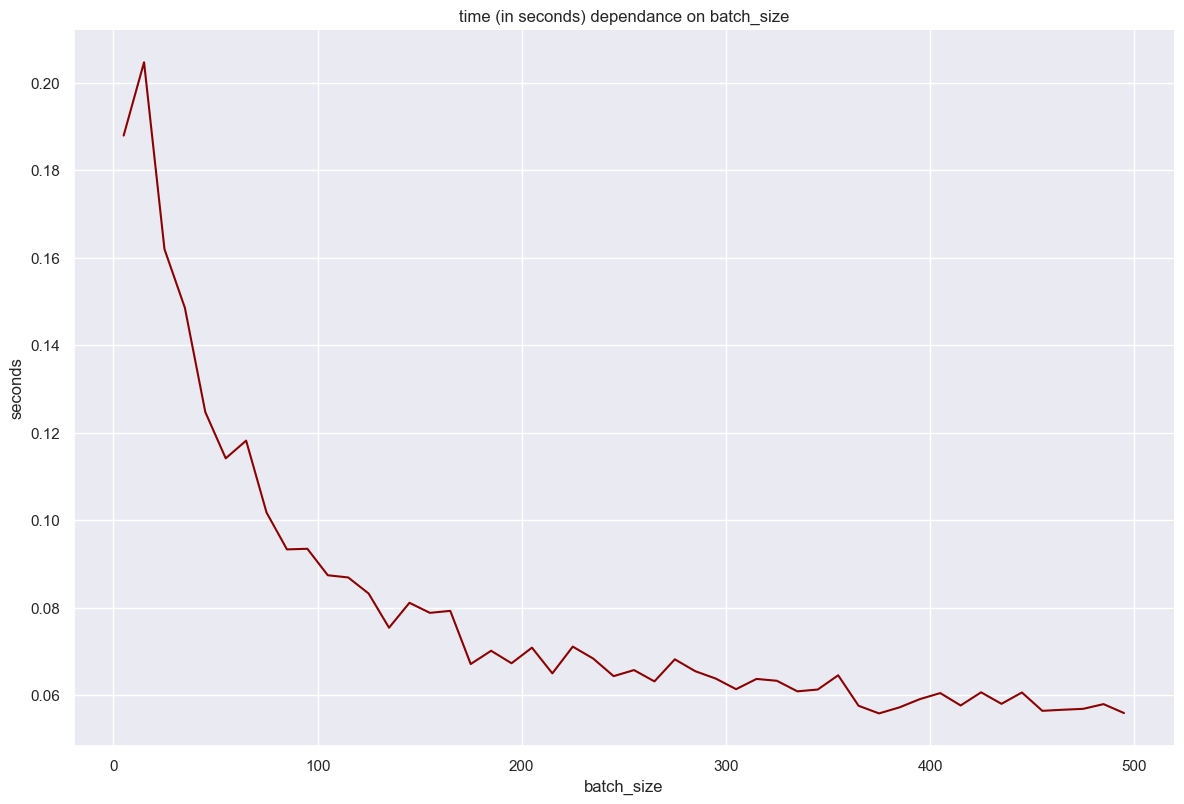

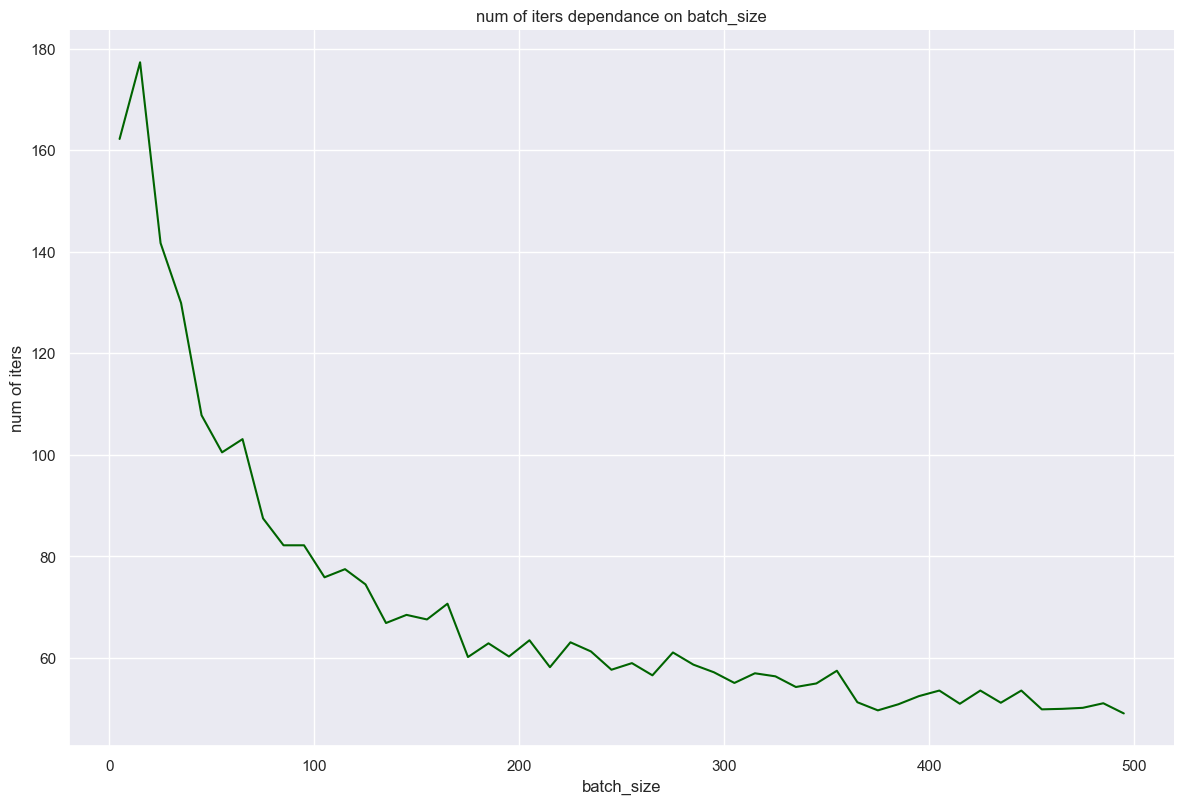

In [61]:
sns.relplot(mean_times,
            height=8,
            aspect=1.5,
            color='darkred',
            kind='line').set(title='time (in seconds) dependance on batch_size', xlabel='batch_size', ylabel='seconds')
sns.relplot(mean_iters,
            height=8,
            aspect=1.5,
            color='darkgreen',
            kind='line').set(title='num of iters dependance on batch_size', xlabel='batch_size', ylabel='num of iters')

Очевидно, что при высоком batch_size оценка градиента становится меньше $\Rightarrow$ шаг становится тоже меньше, то есть мы не перескакиваем оптимальную точку, и начинаем все более и большее оптимально двигаться, поэтому неудивительно, что при высоком batch_size функции количества итераций и времени убывают.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/123722544/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [137]:
def SuperFunction2(name, X_t, y_t, X_v, y_v, lambda_, mu):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': X_t.shape[1],
            'lambda_': lambda_,
            'mu': mu
        },
        'regularized': True
    }
    model = LinearRegression(
        descent_config=descent_config
    )
    model.fit(X_t, y_t)
    y_v_predict = model.predict(X_v)
    val_mse = model.calc_loss(X_v, y_v)
    iter_cnt = len(model.loss_history)
    r2 = r2_score(y_v, y_v_predict)

    return model, val_mse, iter_cnt, r2

In [138]:
lambdas = {'full': np.logspace(-4, -0.5, 15), 'stochastic': np.logspace(-4, -0.5, 15), 'momentum': np.logspace(-4, -0.5, 15), 'adam': np.logspace(-4, 0, 15)}
mus = np.logspace(-4, 0, 5)
best_l = 0
best_r2 = 0
best_mu = 0
metrics_reg = {}
losses_reg = {}

descent_names = ['full', 'stochastic', 'momentum', 'adam']
for descent in descent_names:
    best_val_mse = 1000000000000
    for l in lambdas[descent]:
        for mu in mus:
            model, val_mse, iter_cnt, r2 = SuperFunction2(descent, X_train, y_train, X_val, y_val, l, mu)
            if val_mse < best_val_mse:
                best_l = l
                best_mu = mu
                best_val_mse = val_mse
                best_r2 = r2
                metrics_reg[descent] = {'model' : model,
                                    'val_mse': best_val_mse,
                                    'r2': r2,
                                    'lambda': l,
                                    'num_of_iter': iter_cnt,
                                    'mu': mu
                                    } 
                losses_reg[descent] = model.loss_history
    print(f'best_lambda for {descent} regularized: {best_l}')
    print(f'best_val_mse for {descent} regularized: {best_val_mse}')
    print(f'best_r2 for {descent} regularized: {best_r2}')
    print(f'best_mu for {descent} regularized: {best_mu}')
    print()

best_lambda for full regularized: 0.31622776601683794
best_val_mse for full regularized: 0.2667254613221829
best_r2 for full regularized: 0.751881533218563
best_mu for full regularized: 0.1

best_lambda for stochastic regularized: 0.31622776601683794
best_val_mse for stochastic regularized: 0.26752825370833555
best_r2 for stochastic regularized: 0.7511347443105649
best_mu for stochastic regularized: 0.1

best_lambda for momentum regularized: 0.31622776601683794
best_val_mse for momentum regularized: 0.18021274372917034
best_r2 for momentum regularized: 0.8323590502125073
best_mu for momentum regularized: 0.01

best_lambda for adam regularized: 1.0
best_val_mse for adam regularized: 0.16718102963877457
best_r2 for adam regularized: 0.8444816608684788
best_mu for adam regularized: 0.0001



In [150]:
for m in metrics.keys():
    cur_model = metrics[m]['model']
    print(f'rmse for {m}:', cur_model.calc_loss(X_test, y_test))
    cur_model = metrics_reg[m]['model']
    print(f'rmse for {m} reguralized:', cur_model.calc_loss(X_test, y_test))
    print()


for m in metrics_reg.keys():
    cur_model = metrics[m]['model']
    y_test_predict = cur_model.predict(X_test)
    print(f'r2 for {m}:', r2_score(y_test, y_test_predict))
    cur_model = metrics_reg[m]['model']
    y_test_predict = cur_model.predict(X_test)
    print(f'r2 for {m} reguralized:', r2_score(y_test, y_test_predict))
    print()

rmse for full: 0.41089763643490707
rmse for full reguralized: 0.27585019031386615

rmse for stochastic: 0.3226116175427121
rmse for stochastic reguralized: 0.2768886609535063

rmse for momentum: 0.20673564556093552
rmse for momentum reguralized: 0.18892823309454976

rmse for adam: 0.17511735089674504
rmse for adam reguralized: 0.17460512562066094

r2 for full: 0.62132333635875
r2 for full reguralized: 0.7457808941439206

r2 for stochastic: 0.7026863136937661
r2 for stochastic reguralized: 0.7448238562779437

r2 for momentum: 0.809475748763192
r2 for momentum reguralized: 0.8258867741449908

r2 for adam: 0.8386146614066049
r2 for adam reguralized: 0.839086719995851



In [151]:
print('full reguralized:', pl.DataFrame(metrics_reg['full']).drop('model'))
print('stochastic reguralized: ', pl.DataFrame(metrics_reg['stochastic']).drop('model'))
print('momentum reguralized:', pl.DataFrame(metrics_reg['momentum']).drop('model'))
print('Adam reguralized:', pl.DataFrame(metrics_reg['adam']).drop('model'))

full reguralized: shape: (1, 5)
┌──────────┬──────────┬──────────┬─────────────┬─────┐
│ val_mse  ┆ r2       ┆ lambda   ┆ num_of_iter ┆ mu  │
│ ---      ┆ ---      ┆ ---      ┆ ---         ┆ --- │
│ f64      ┆ f64      ┆ f64      ┆ i64         ┆ f64 │
╞══════════╪══════════╪══════════╪═════════════╪═════╡
│ 0.266725 ┆ 0.751882 ┆ 0.316228 ┆ 207         ┆ 0.1 │
└──────────┴──────────┴──────────┴─────────────┴─────┘
stochastic reguralized:  shape: (1, 5)
┌──────────┬──────────┬──────────┬─────────────┬─────┐
│ val_mse  ┆ r2       ┆ lambda   ┆ num_of_iter ┆ mu  │
│ ---      ┆ ---      ┆ ---      ┆ ---         ┆ --- │
│ f64      ┆ f64      ┆ f64      ┆ i64         ┆ f64 │
╞══════════╪══════════╪══════════╪═════════════╪═════╡
│ 0.267528 ┆ 0.751135 ┆ 0.316228 ┆ 287         ┆ 0.1 │
└──────────┴──────────┴──────────┴─────────────┴─────┘
momentum reguralized: shape: (1, 5)
┌──────────┬──────────┬──────────┬─────────────┬──────┐
│ val_mse  ┆ r2       ┆ lambda   ┆ num_of_iter ┆ mu   │
│ ---      

Как можно заметить как и на тестовой так и трейне почти везде показатели повысились. Но стоит поплатиться количеством итераций до сходимости.

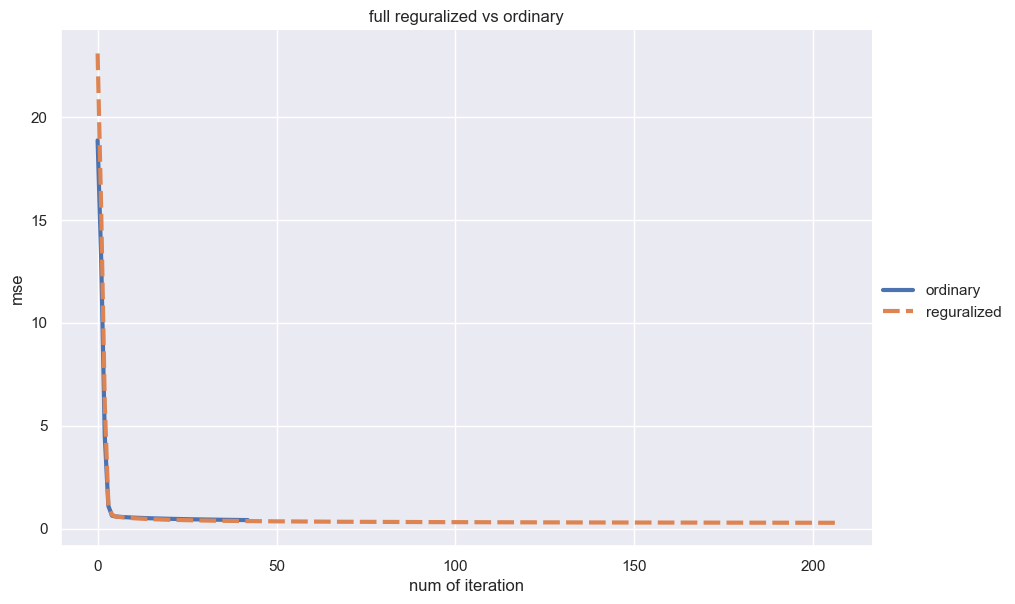

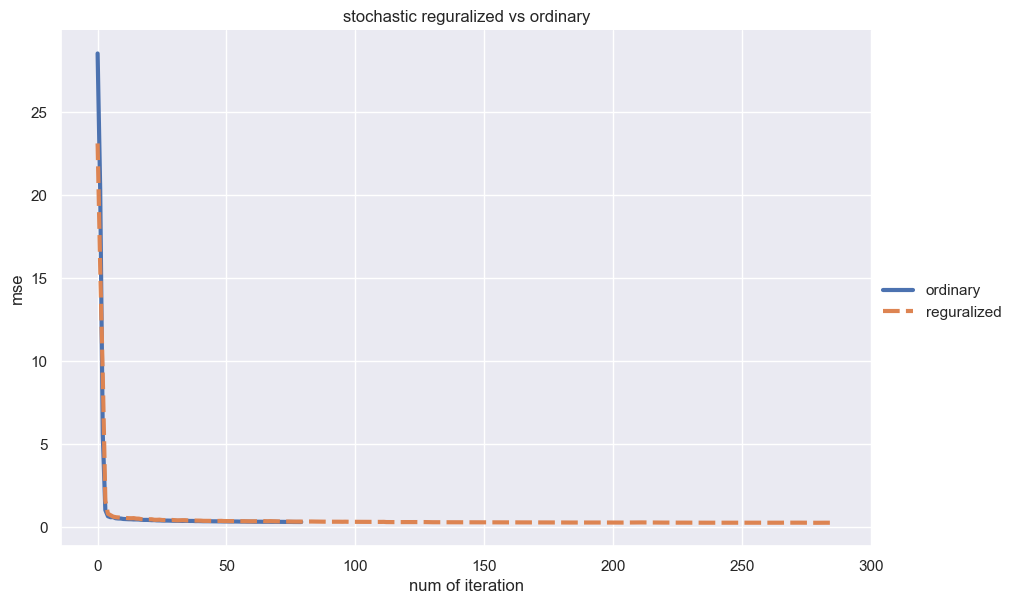

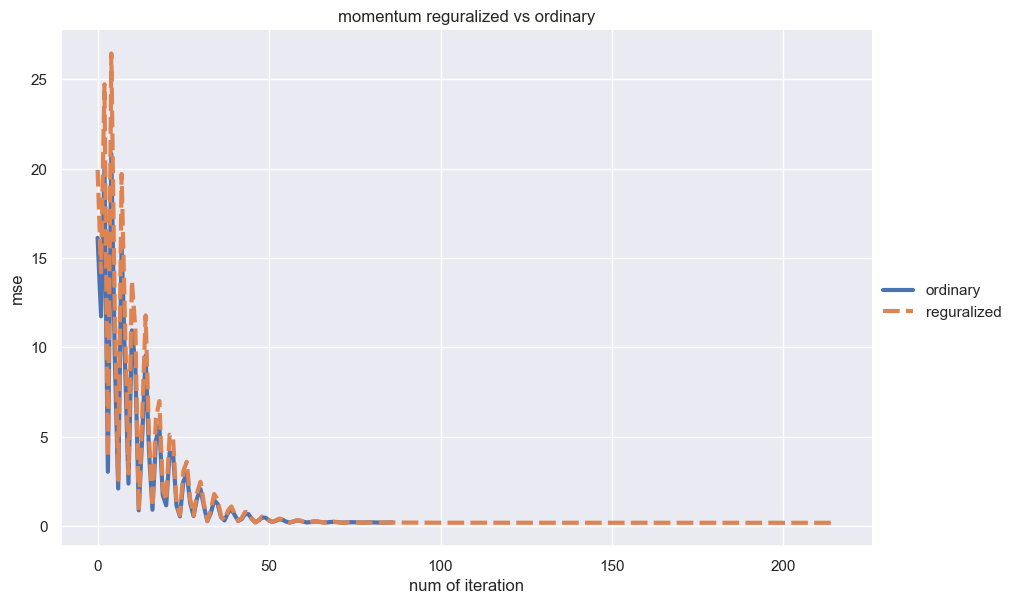

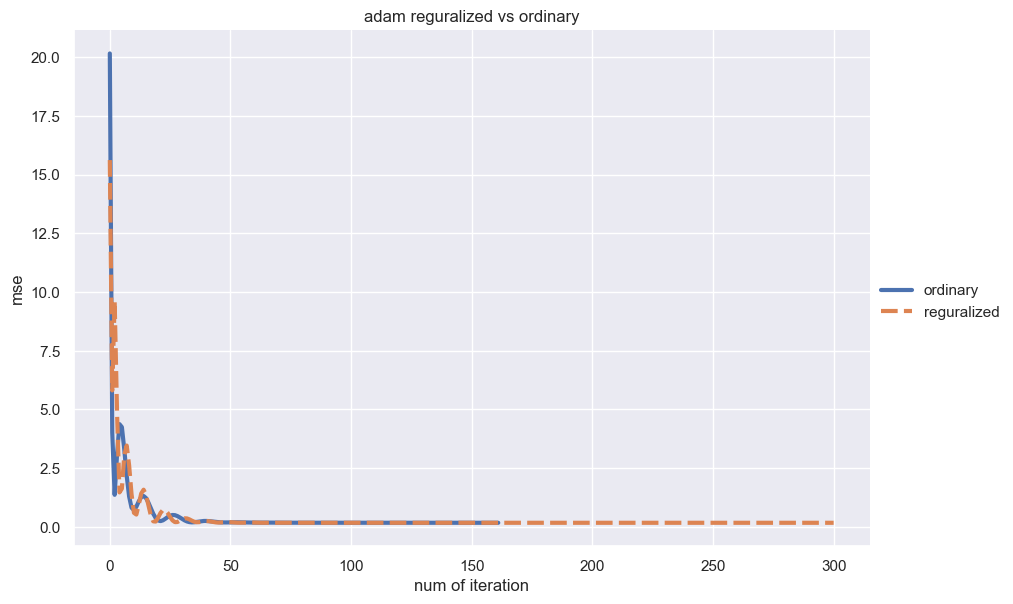

In [152]:
full = {'ordinary': losses['full'], 'reguralized': losses_reg['full']}
stochastic = {'ordinary': losses['stochastic'], 'reguralized': losses_reg['stochastic']}
momentum = {'ordinary': losses['momentum'], 'reguralized': losses_reg['momentum']}
adam = {'ordinary': losses['adam'], 'reguralized': losses_reg['adam']}
sns.relplot(full,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='full reguralized vs ordinary', xlabel='num of iteration', ylabel='mse')
sns.relplot(stochastic,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='stochastic reguralized vs ordinary', xlabel='num of iteration', ylabel='mse')
sns.relplot(momentum,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='momentum reguralized vs ordinary', xlabel='num of iteration', ylabel='mse')
sns.relplot(adam,
            height=6,
            aspect=1.5,
            linewidth = 3,
            kind='line').set(title='adam reguralized vs ordinary', xlabel='num of iteration', ylabel='mse')

Регуляризация добавляет дополнительные ограничения или штрафы к функции потерь, что помогает модели лучше обобщать данные и улучшать метрики, но эти дополнительные условия усложняют оптимизационный ландшафт $\Rightarrow$ требует больше итераций до сходимости

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$L(w) = \log\left(\cosh(x_iw- y)\right)$, где $x_i$ соответственно i-я строка матрицы $X$

Воспользуемся формулой дифференциала сложной функции:

$f(x) = log(x), \ g(y) = cosh(y), \ h(w) = x_iw - y_i$

У нас функция $\ (f(g(h(x))))$

$df(g(h(w)))[w] = df(g(h(w))) \cdot dg(h(w)) \cdot dh \cdot dw$, так как функция бьет из скаляров в скаляр, то градиент представим в виде производной $\cdot$ приращение

$$dh(w) = d(x_iw - y_i) = d(x_iw) = x_idw$$

$$dg(y) = d(\cosh(y)) = d(\frac{e^{y} + e^{-y}}{2}) = \frac{1}{2}(e^{y} - e^{-y})dy = \sh(y)dy$$

$$df(x) = d(\log(x)) = \frac{1}{x}dx$$

Теперь собирая формулу по кусочкам получаем:

$$df(w) = \frac{\sh(x_iw - y_i)}{\cosh(x_iw - y_i)}x_idw = \th(x_iw - y_i)x_idw$$

Нам интересен функционал, так что хотим градиент для $Q(w) = \frac{1}{l}\sum_{i = 1}^{\ell}\log\left(\cosh(x_iw- y_i)\right)$

Таким образом используя линейность дифференциала получим, что $dQ(w) = \th(Xw - y)^{T}Xdw$

Проверим, что все ок: $$\frac{1}{\ell}\left( \begin{matrix} x_1w - y_1, \ \ \cdots, \ \ x_lw - y_l \end{matrix} \right) \left( \begin{matrix} x_1 \\ x_2 \\ \cdots \\ x_l \end{matrix} \right)dw = \underbrace{\frac{1}{\ell}\sum_{i = 1}^{\ell}\th(x_iw - y_i)x_i}_{1 \times d} \underbrace{dw}_{d \times 1}$$

Вроде все работает 

$$\nabla_w Q = \frac{1}{\ell}\left(\th(Xw - y)^{T}X\right)^T = \frac{1}{\ell}X^T\th(Xw - y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [122]:
#создадим функцию, которая будет трейнить все 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from descents import LossFunction

def SuperFunction3(name, X_t, y_t, X_v, y_v, lambda_):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': X_t.shape[1],
            'lambda_': lambda_,
            'loss_function': LossFunction.LogCosh
        }
    }
    model = LinearRegression(
        descent_config=descent_config
    )
    model.fit(X_t, y_t)
    y_v_predict = model.predict(X_v)
    val_mse = model.calc_loss(X_v, y_v)
    iter_cnt = len(model.loss_history)
    r2 = r2_score(y_v, y_v_predict)

    return model, val_mse, iter_cnt, r2


In [128]:
lambdas = {'full': np.logspace(-4, 1, 20), 'stochastic': np.logspace(-4, 1, 20), 'momentum': np.logspace(-4, 1, 20), 'adam': np.logspace(-4, 1, 20)}
best_l_logcosh = 0
best_r2_logcosh = 0
metrics_logcosh = {}
losses_logcosh = {}

descent_names = ['full', 'stochastic', 'momentum', 'adam']
for descent in descent_names:
    best_val_mse = 1000000000000
    for l in lambdas[descent]:
        model, val_mse, iter_cnt, r2 = SuperFunction3(descent, X_train, y_train, X_val, y_val, l)
        if val_mse < best_val_mse:
            best_l_logcosh = l
            best_val_mse = val_mse
            best_r2_logcosh = r2
            metrics_logcosh[descent] = {'model' : model,
                                'val_mse': best_val_mse,
                                'r2': r2,
                                'lambda': l,
                                'num_of_iter': iter_cnt
                                } 
            losses_logcosh[descent] = model.loss_history
    print(f'best_lambda for {descent}: {best_l_logcosh}')
    print(f'best_val_mse for {descent}: {best_val_mse}')
    print(f'best_r2 for {descent}: {best_r2_logcosh}')
    print()

best_lambda for full: 5.455594781168514
best_val_mse for full: 0.09531637097173955
best_r2 for full: 0.7967359144437728

best_lambda for stochastic: 5.455594781168514
best_val_mse for stochastic: 0.09005882121998303
best_r2 for stochastic: 0.8090281516658232

best_lambda for momentum: 5.455594781168514
best_val_mse for momentum: 0.07677625887773852
best_r2 for momentum: 0.8377643081529472

best_lambda for adam: 10.0
best_val_mse for adam: 0.0734617495551884
best_r2 for adam: 0.8453531311962761



In [129]:
for m in metrics_logcosh.keys():
    cur_model = metrics_logcosh[m]['model']
    y_test_predict = cur_model.predict(X_test)
    print(f'rmse for {m}:', cur_model.calc_loss(X_test, y_test))
    print(f'r2 for {m}:', r2_score(y_test, y_test_predict))
    print()

rmse for full: 0.09597115990293198
r2 for full: 0.7956792277721827

rmse for stochastic: 0.09348898317968457
r2 for stochastic: 0.8012991796303527

rmse for momentum: 0.07954297789783468
r2 for momentum: 0.8310866925898294

rmse for adam: 0.0757642295213993
r2 for adam: 0.8396889625201599



Обалдеть, все улучшилось относительно нерегуляризованных первых моделей 

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [165]:
def SuperFunction4(name, X_t, y_t, X_v, y_v, lambda_):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': X_t.shape[1],
            'lambda_': lambda_
        }
    }
    model = LinearRegression(
        descent_config=descent_config
    )
    model.fit(X_t, y_t)
    y_v_predict = model.predict(X_v)
    val_mse = model.calc_loss(X_v, y_v)
    iter_cnt = len(model.loss_history)
    r2 = r2_score(y_v, y_v_predict)

    return model, val_mse, iter_cnt, r2

lambdas = np.logspace(-4, 2, 20)
best_l_adamax = 0
best_r2_adamax = 0
metrics_adamax = metrics.copy()
losses_adamax = losses.copy()

descent_names = ['adamax']
for descent in descent_names:
    best_val_mse = 1000000000000
    for l in lambdas:
        model, val_mse, iter_cnt, r2 = SuperFunction4(descent, X_train, y_train, X_val, y_val, l)
        if val_mse < best_val_mse:
            best_l_adamax = l
            best_val_mse = val_mse
            best_r2_adamax = r2
            metrics_adamax[descent] = {'model' : model,
                                'val_mse': best_val_mse,
                                'r2': r2,
                                'lambda': l,
                                'num_of_iter': iter_cnt
                                } 
            losses_adamax[descent] = model.loss_history
    print(f'best_lambda for {descent}: {best_l_adamax}')
    print(f'best_val_mse for {descent}: {best_val_mse}')
    print(f'best_r2 for {descent}: {best_r2_adamax}')
    print()


best_lambda for adamax: 1.2742749857031321
best_val_mse for adamax: 0.16975171152892815
best_r2 for adamax: 0.8420903119286136



In [171]:
print('метрики на тесте')
print()
for m in metrics_adamax.keys():
    cur_model = metrics_adamax[m]['model']
    y_test_predict = cur_model.predict(X_test)
    print(f'rmse for {m}:', cur_model.calc_loss(X_test, y_test))
    print(f'r2 for {m}:', r2_score(y_test, y_test_predict))
    print()

метрики на тесте

rmse for full: 0.33216869535465876
r2 for full: 0.693878664247574

rmse for stochastic: 0.3170925125169036
r2 for stochastic: 0.707772632261067

rmse for momentum: 0.2132388199666924
r2 for momentum: 0.8034825276572843

rmse for adam: 0.17448031196614006
r2 for adam: 0.8392017462556295

rmse for adamax: 0.17672081608697024
r2 for adamax: 0.8371369336353581



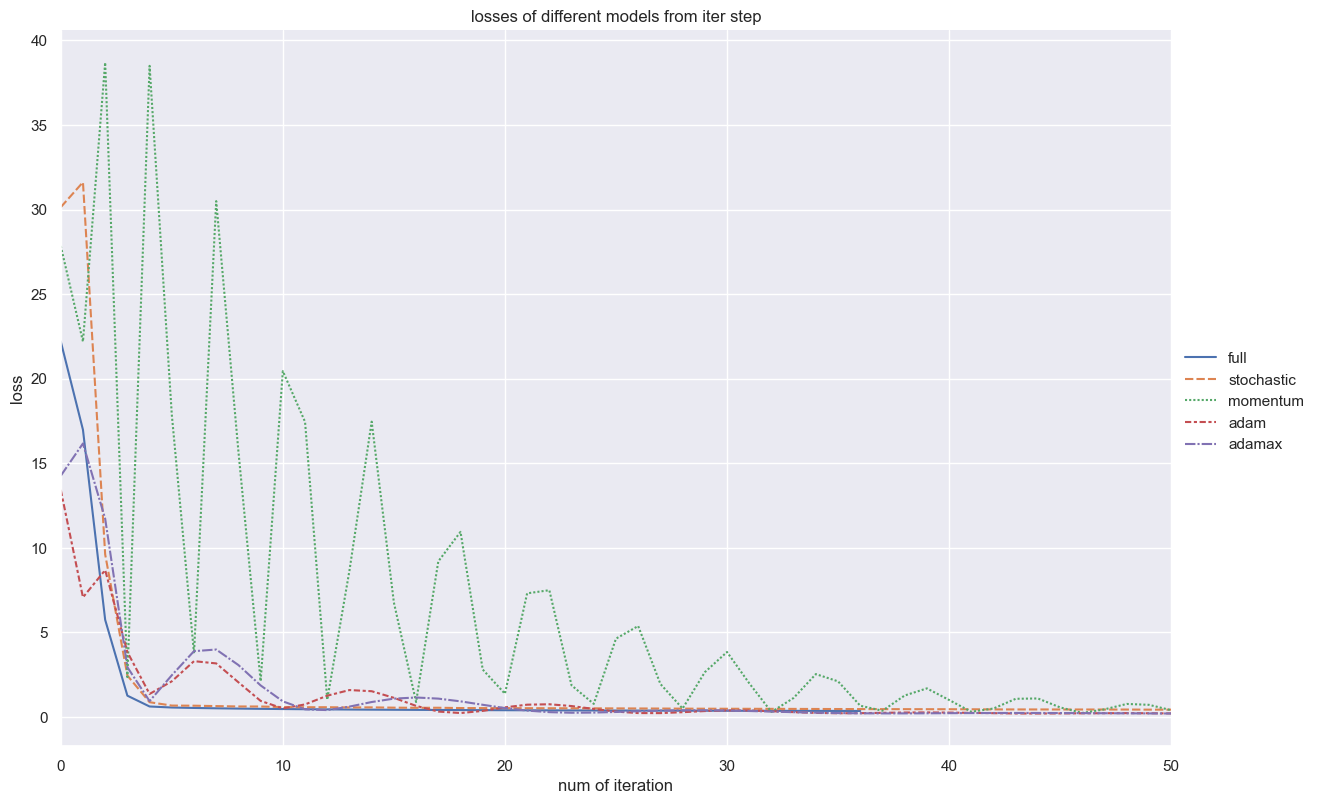

In [169]:
sns.relplot(losses_adamax,
            kind='line',
            height=8,
            aspect=1.5).set(xlabel='num of iteration', ylabel='loss', title='losses of different models from iter step', xlim=(0, 50))

In [174]:
pl.DataFrame(metrics_adamax['adamax']).drop('model')

val_mse,r2,lambda,num_of_iter
f64,f64,f64,i64
0.169752,0.84209,1.274275,110


Ну тут у нас количество итераций уменьшилось относительно дефолтного адама, но метрики стали немножко хуже, тем не менее он все еще круче, чем momentum stochastic и full

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# очень лень 